In [51]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

In [190]:
import warnings
warnings.filterwarnings('ignore')

In [166]:
districts = pd.read_csv('districts.csv')

In [191]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt


for i in range(0, 127):
    img_path = "files/" + str(i) + ".png"
    img_cv = cv2.imread(img_path)
    
    # Преобразуем в оттенки серого и выделим красную линию
    hsv = cv2.cvtColor(img_cv, cv2.COLOR_BGR2HSV)
    lower_red = np.array([0, 70, 50])
    upper_red = np.array([10, 255, 255])
    mask1 = cv2.inRange(hsv, lower_red, upper_red)
    
    lower_red2 = np.array([160, 70, 50])
    upper_red2 = np.array([180, 255, 255])
    mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
    
    mask = cv2.bitwise_or(mask1, mask2)
    
    # Найдем координаты красной линии
    ys, xs = np.where(mask > 0)
    
    # Нормализуем координаты по ширине и высоте изображения
    height, width = img_cv.shape[:2]
    norm_xs = xs / width  # 0 to 1 scale for time
    norm_ys = 1 - (ys / height)  # inverted y: 0 (bottom) to 1 (top)
    
    # Интерполяция по времени: 2000–2025 (25 лет)
    years = norm_xs * (2025 - 2000) + 2000
    
    # Интерполяция по цене: 0–400000 руб/м²
    prices = norm_ys * int(districts.loc[[i]]['Цена'])
    
    # Соберем в DataFrame и усредним по каждому году
    graph_data = pd.DataFrame({'Год': years, 'Цена': prices})
    graph_data['Год'] = graph_data['Год'].round().astype(int)
    df = graph_data.groupby('Год')['Цена'].mean().reset_index()
    df['Район'] = i

    if i == 0:
        df_all = df
    else:
        df_all = pd.concat([df, df_all])

df.head(5)

Год          Цена  Район
0  2000  14211.886305    126
1  2001  17206.159648    126
2  2002  25140.702984    126
3  2003  29885.760914    126
4  2004  40541.275670    126

In [192]:
df_all

Год           Цена  Район
0   2000   14211.886305    126
1   2001   17206.159648    126
2   2002   25140.702984    126
3   2003   29885.760914    126
4   2004   40541.275670    126
..   ...            ...    ...
21  2021  216252.028123      0
22  2022  256910.299003      0
23  2023  255537.646788      0
24  2024  269622.093023      0
25  2025  272609.819121      0

[3302 rows x 3 columns]

In [193]:
macro_data = pd.read_csv('macro.csv')

In [194]:
df_merged = pd.merge(df_all, macro_data, on="Год", how="left")

In [184]:
df_merged

Год           Цена  Район  Ковид  Санкции  Ключевая ставка ЦБ РФ (%)  \
0     2000   14211.886305    126      0        0                       28.0   
1     2001   17206.159648    126      0        0                       25.0   
2     2002   25140.702984    126      0        0                       23.0   
3     2003   29885.760914    126      0        0                       14.0   
4     2004   40541.275670    126      0        0                       13.0   
...    ...            ...    ...    ...      ...                        ...   
3297  2021  216252.028123      0      1        1                        8.5   
3298  2022  256910.299003      0      1        2                       20.0   
3299  2023  255537.646788      0      0        2                       16.0   
3300  2024  269622.093023      0      0        2                       21.0   
3301  2025  272609.819121      0      0        2                       21.0   

      ИПЦ (% к декабрю предыдущего года)   Доллар  
0                                  119.3  28.8300  
1                                  118.6  30.1400  
2                                  115.1  31.7844  
3                                  112.0  29.4545  
4                                  111.7  27.7487  
...                                  ...      ...  
3297                               108.4  73.6552  
3298                               111.9  68.5386  
3299                               107.4  85.2997  
3300                               109.5  92.6225  
3301                               110.2  89.0444  

[3302 rows x 8 columns]

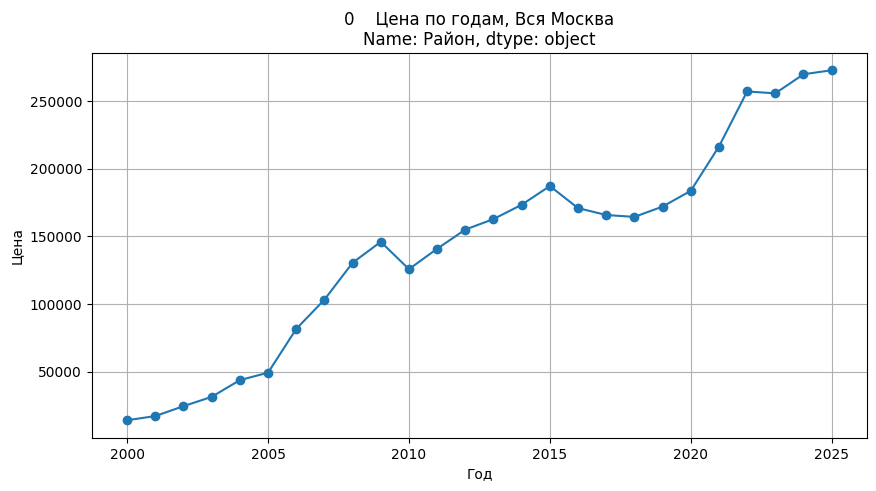

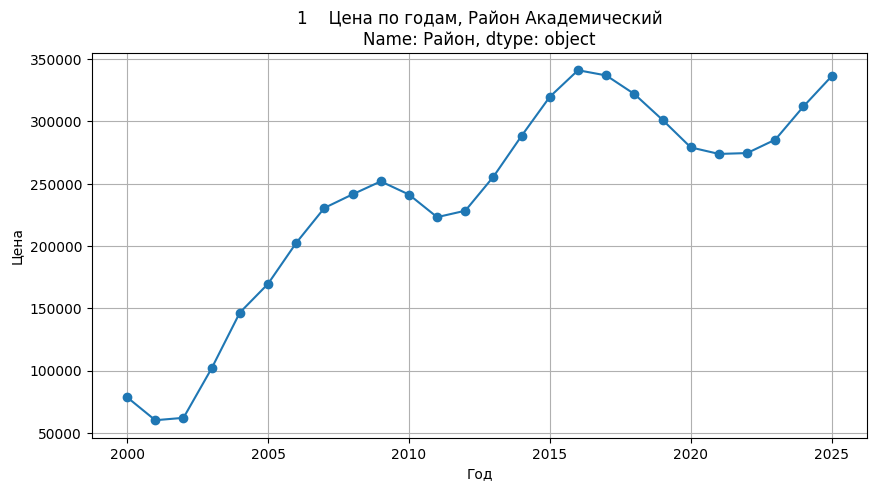

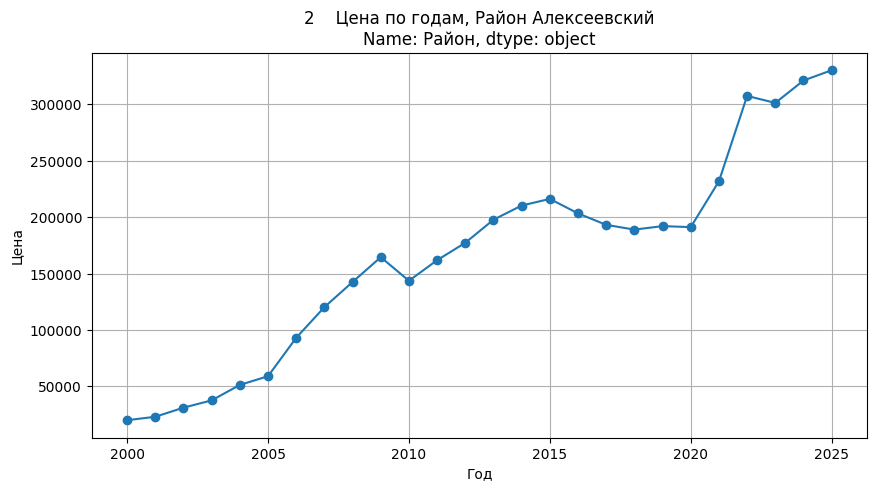

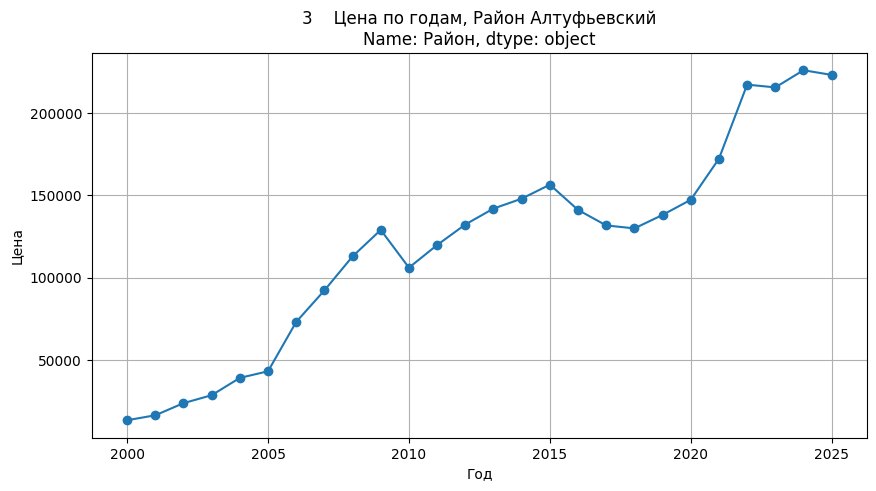

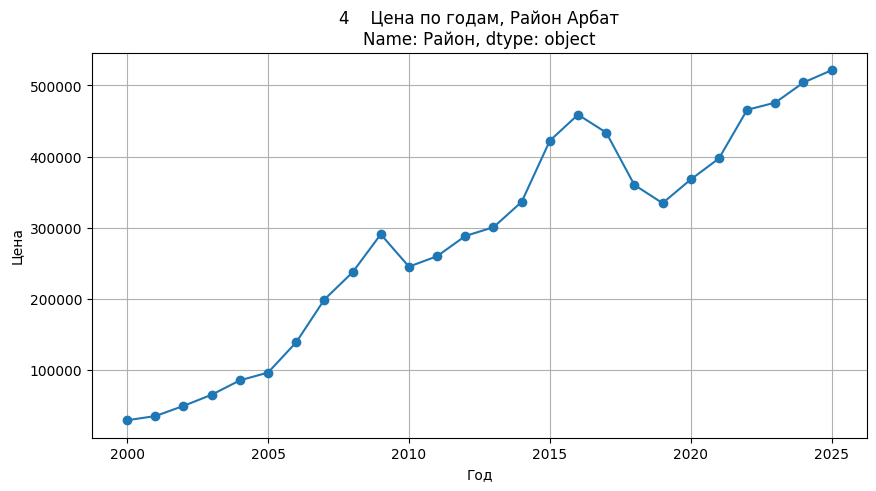

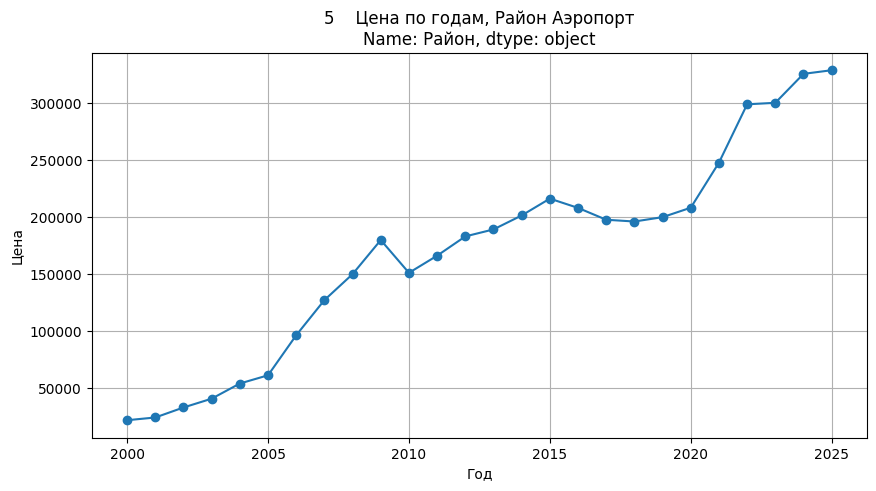

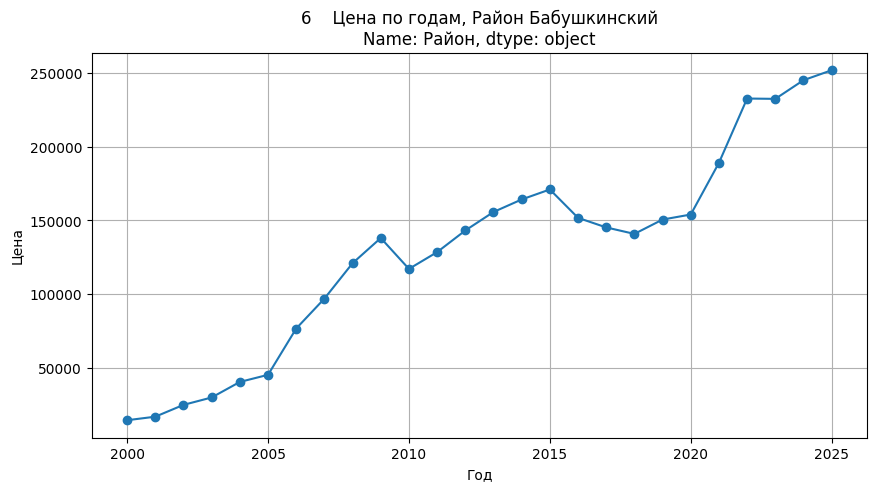

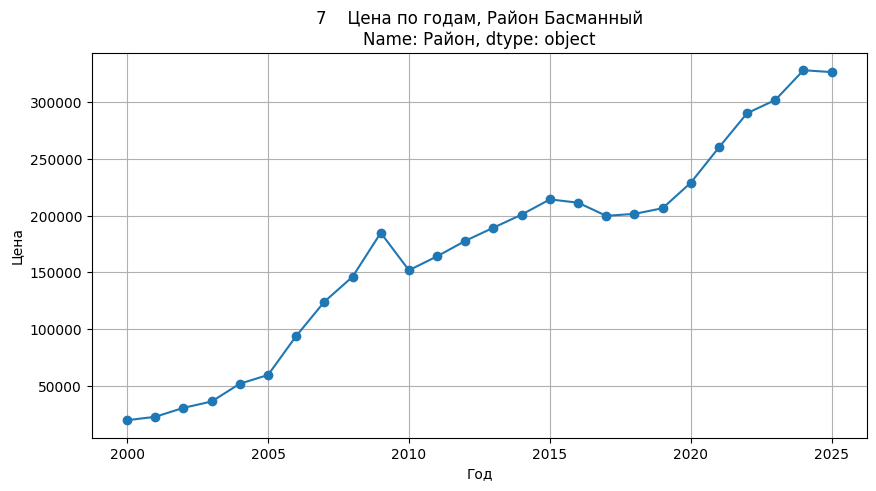

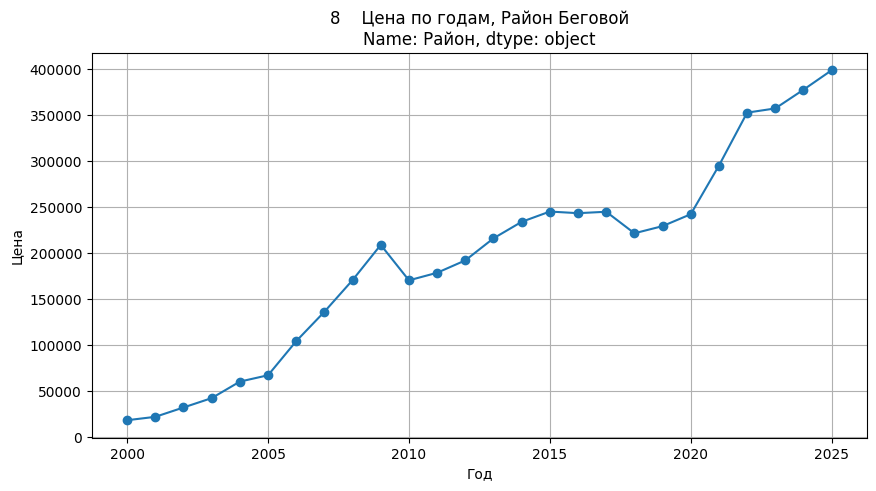

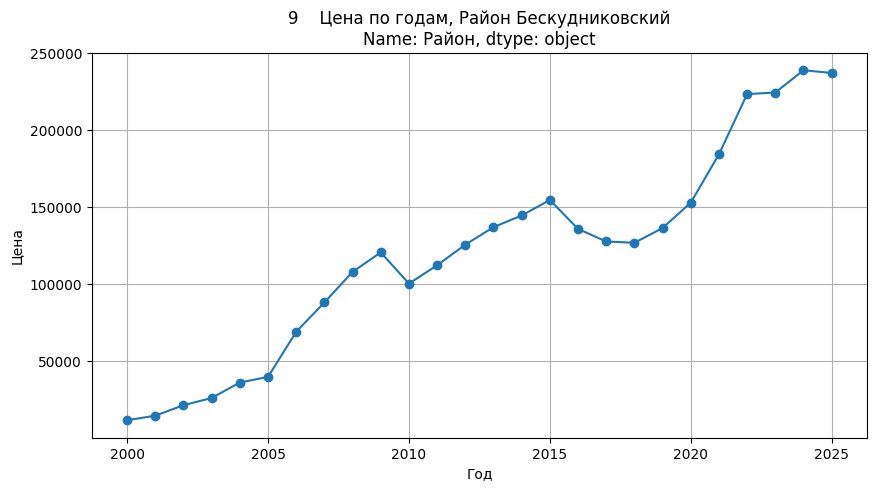

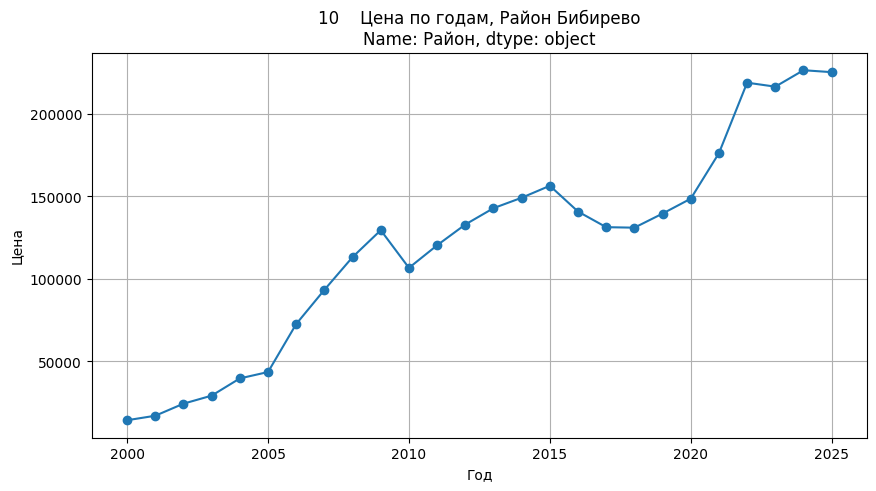

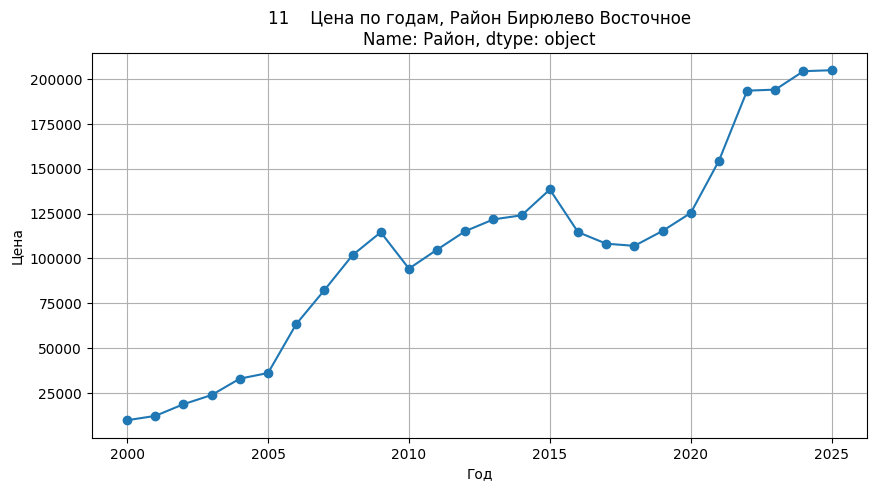

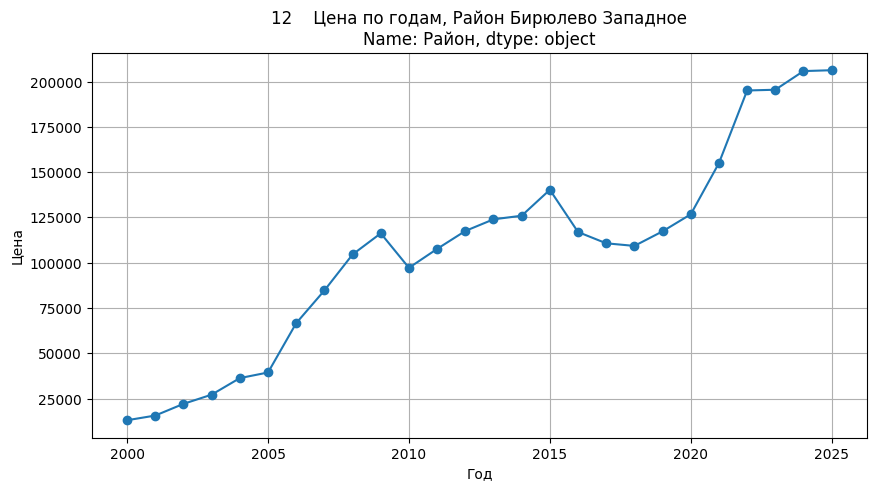

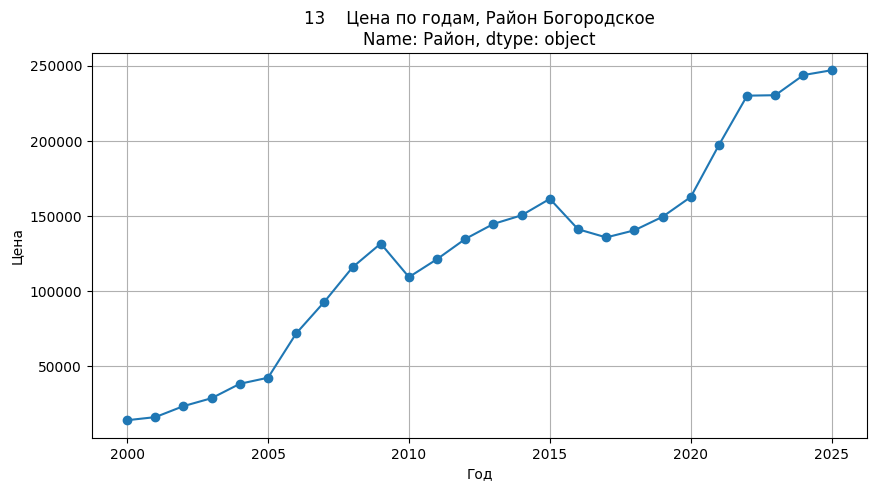

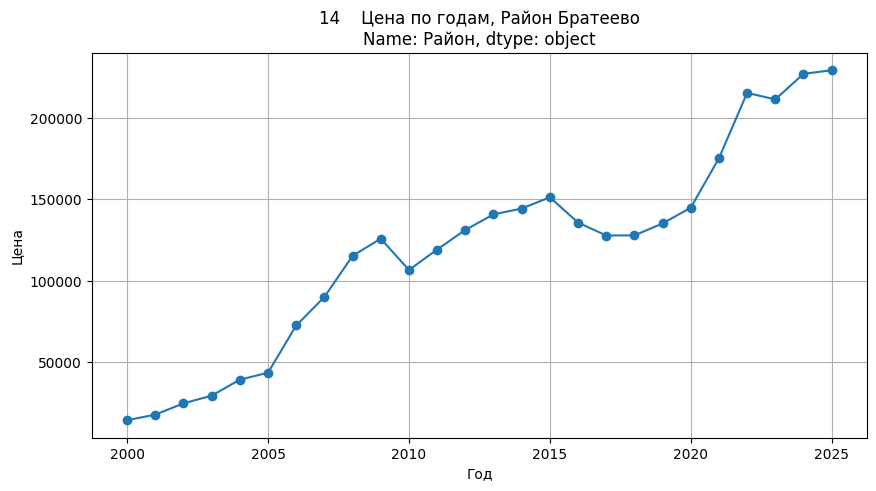

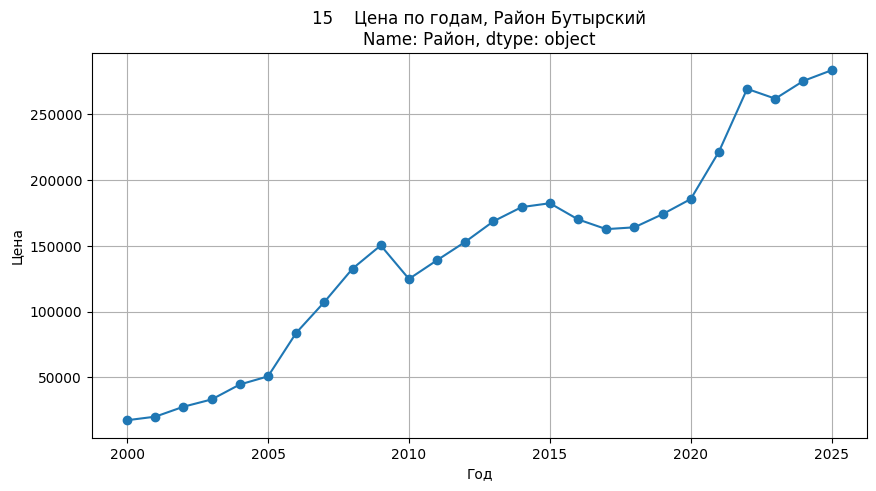

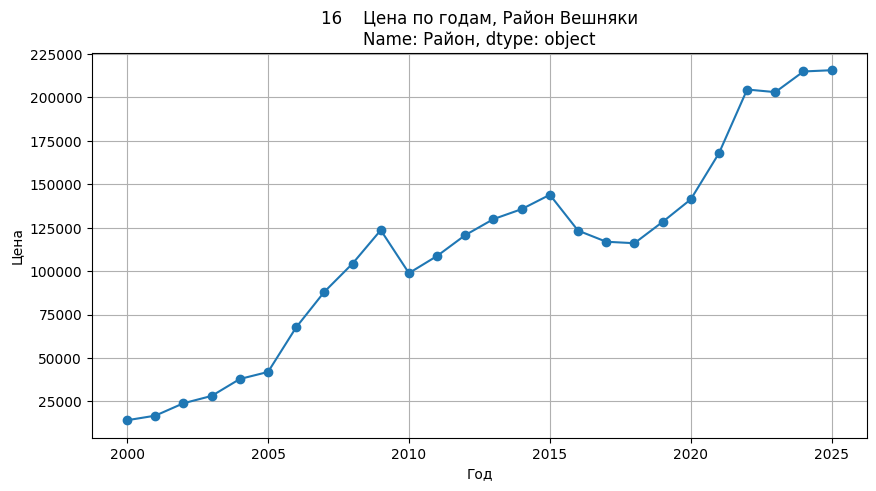

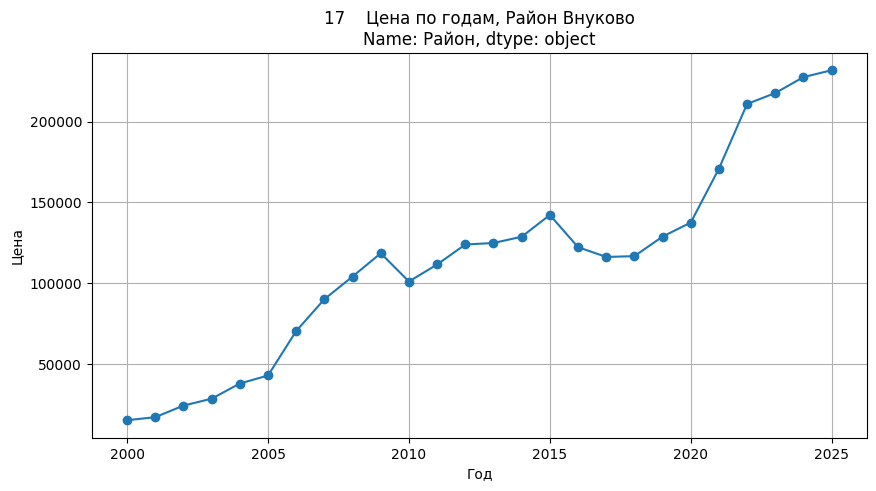

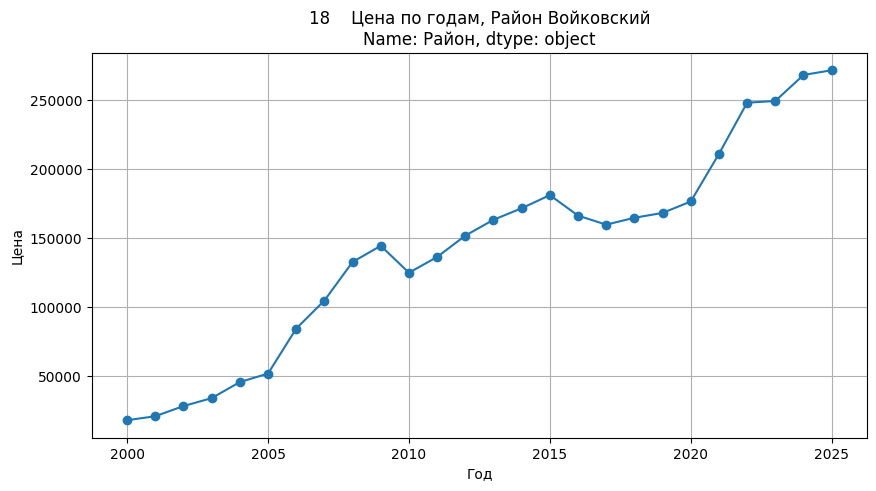

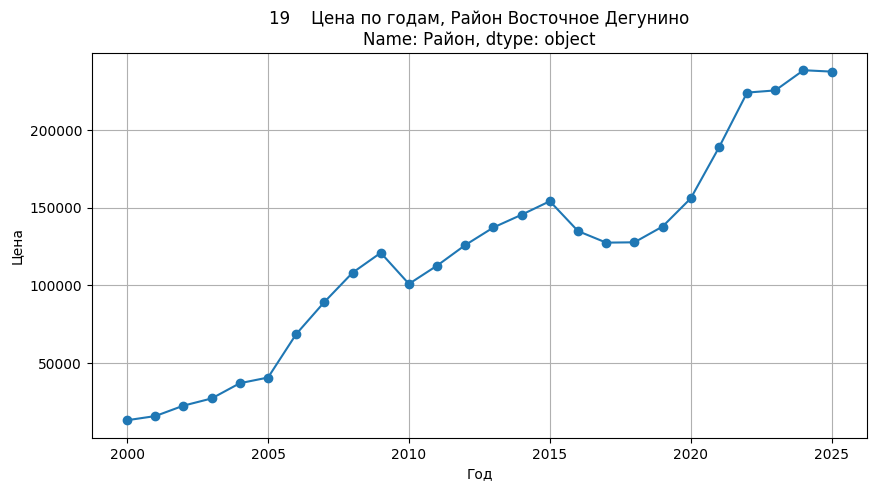

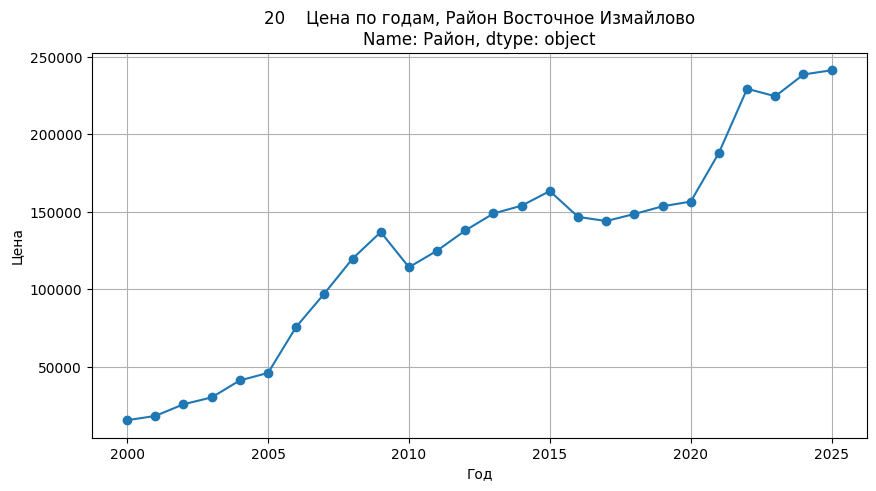

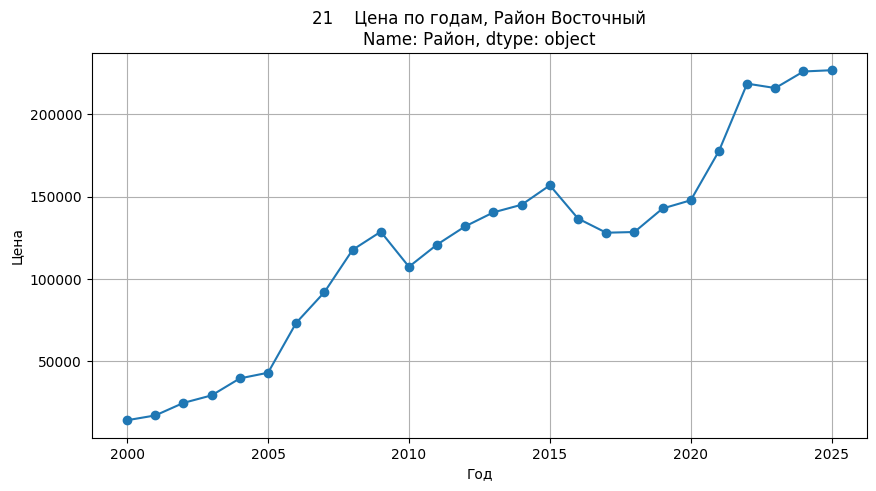

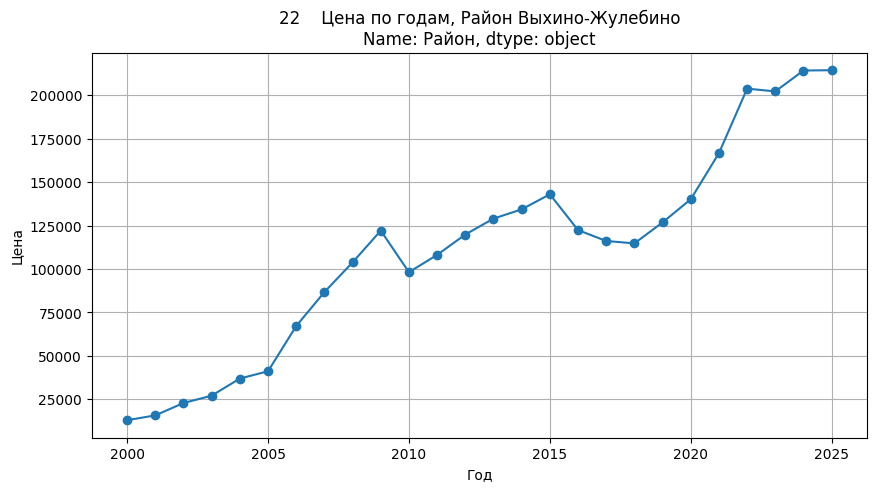

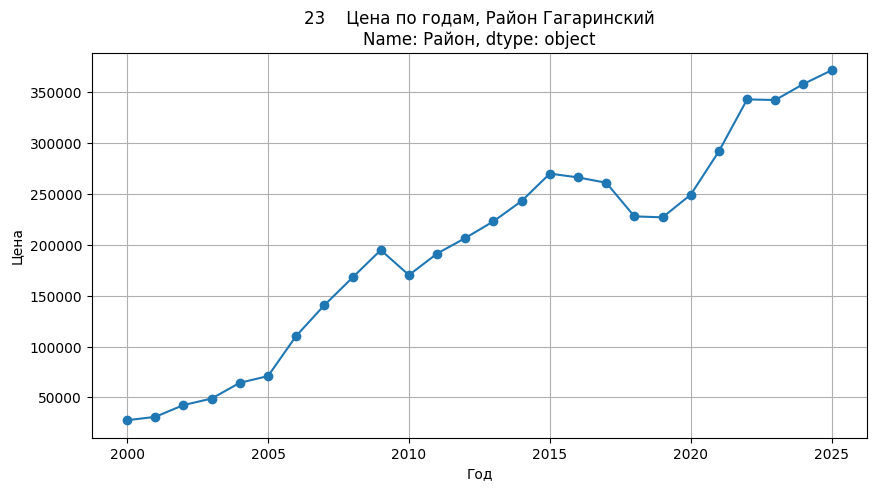

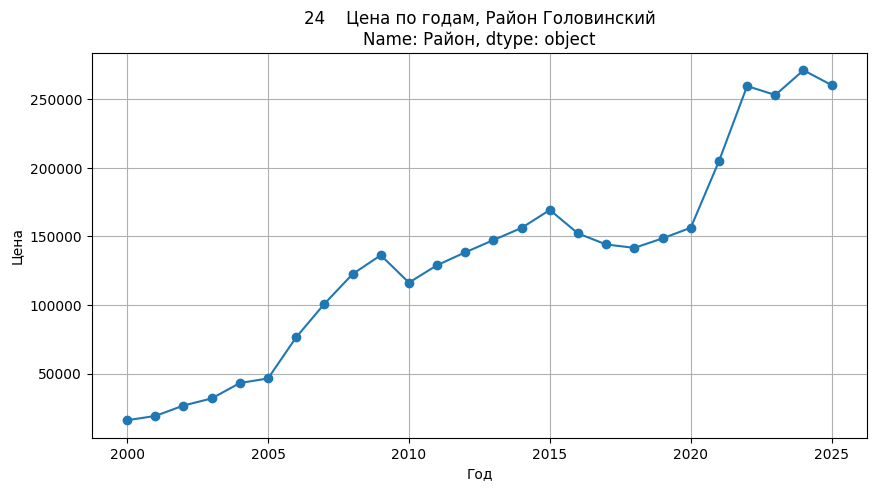

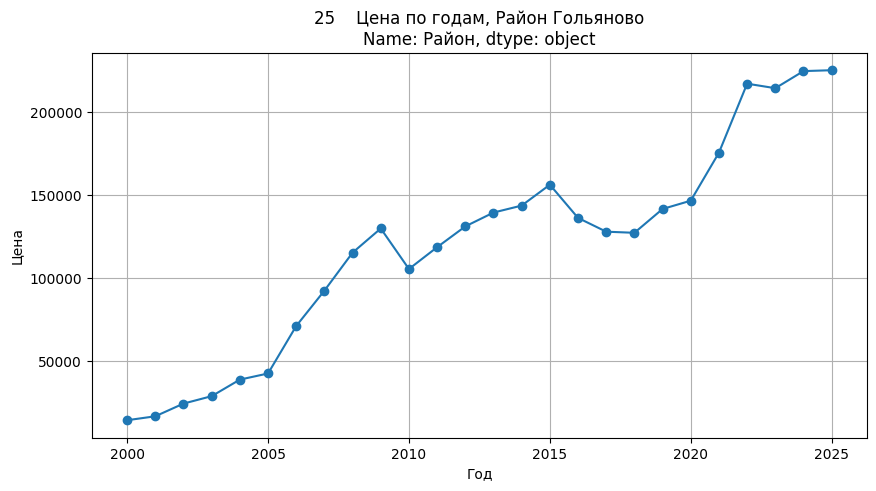

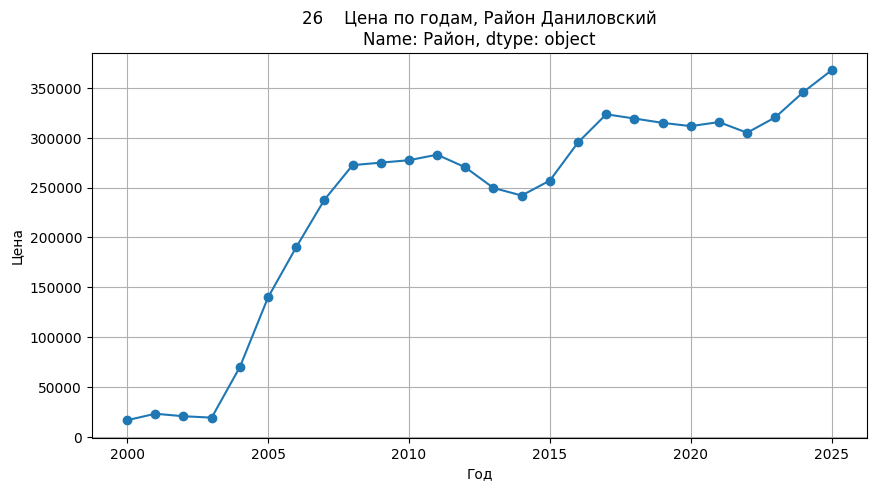

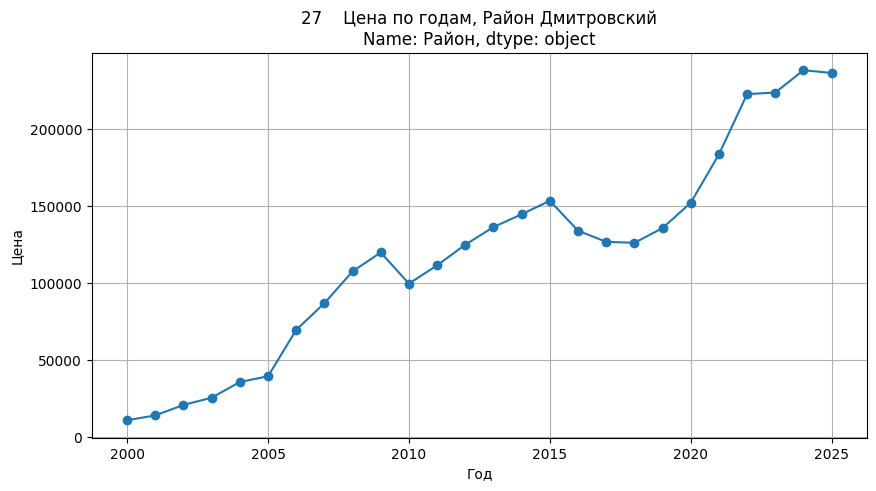

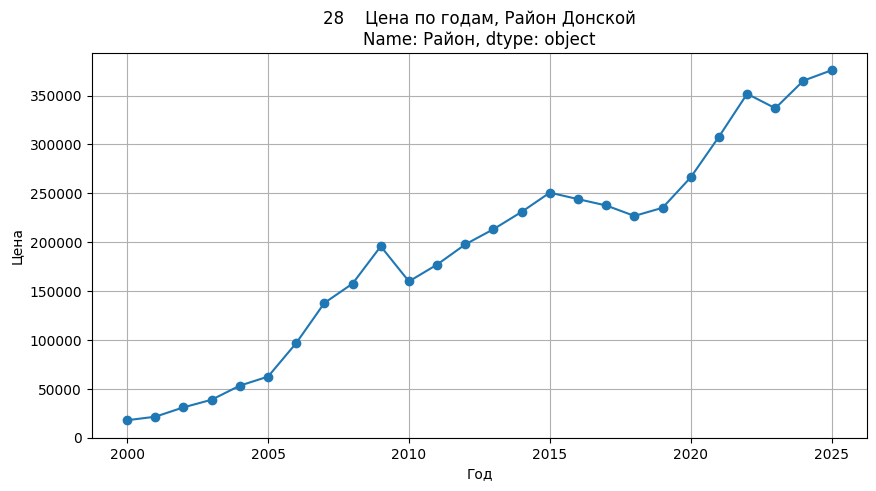

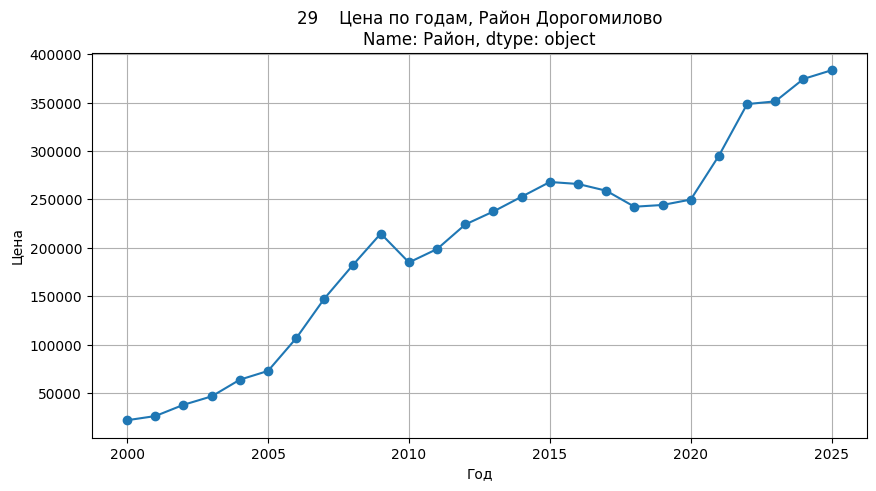

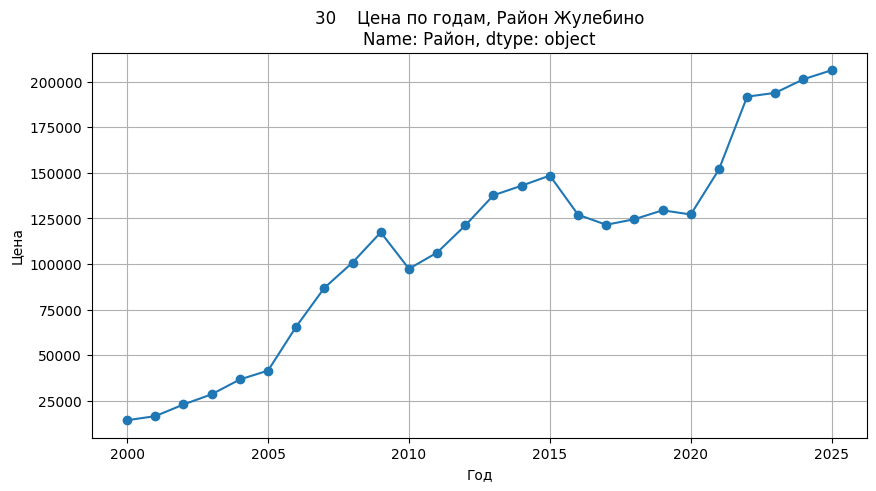

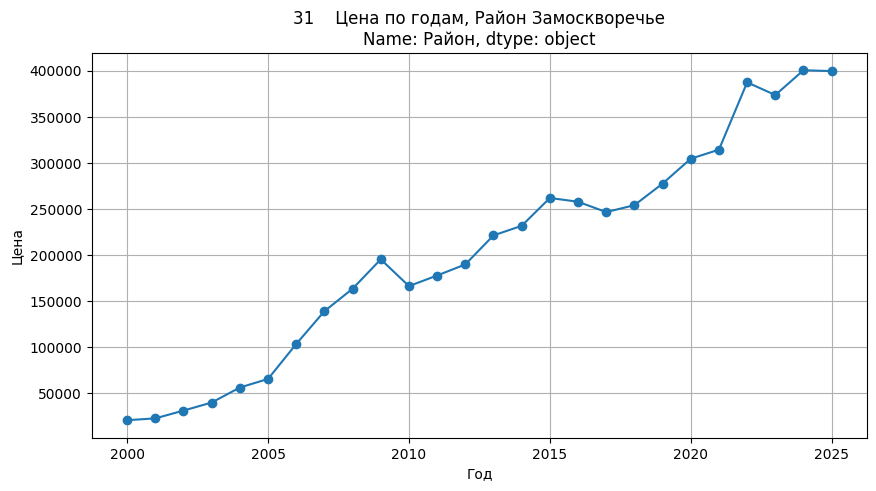

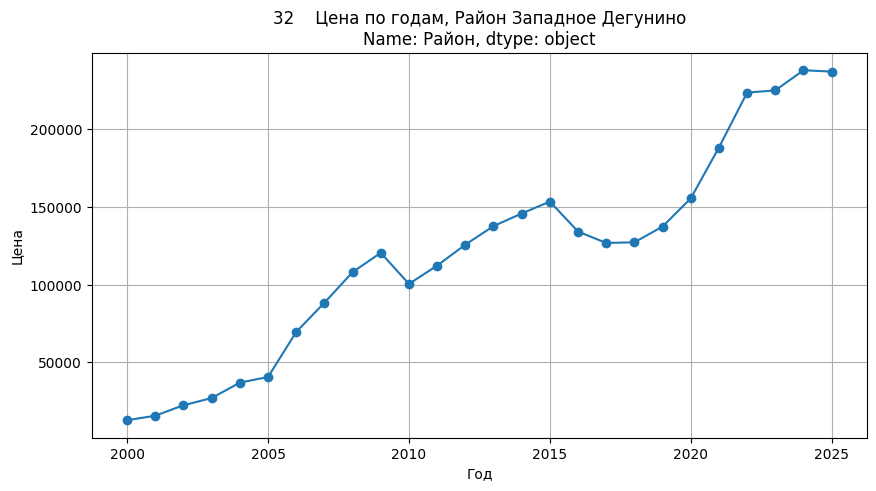

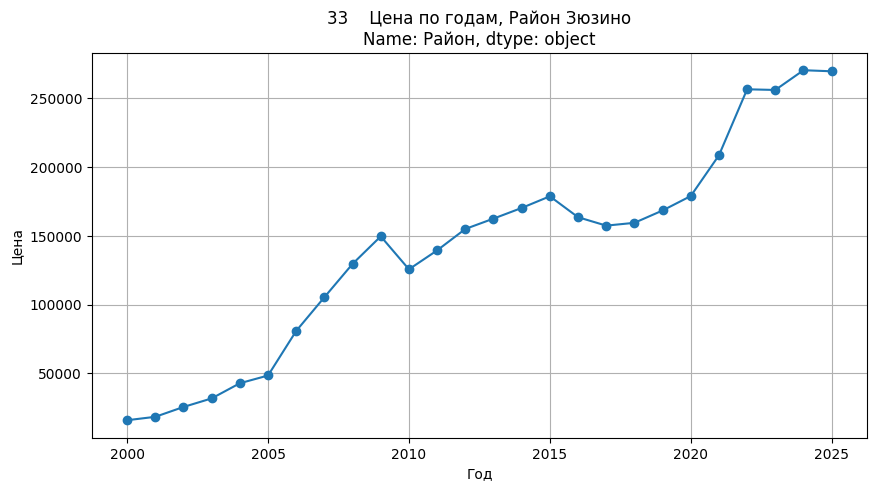

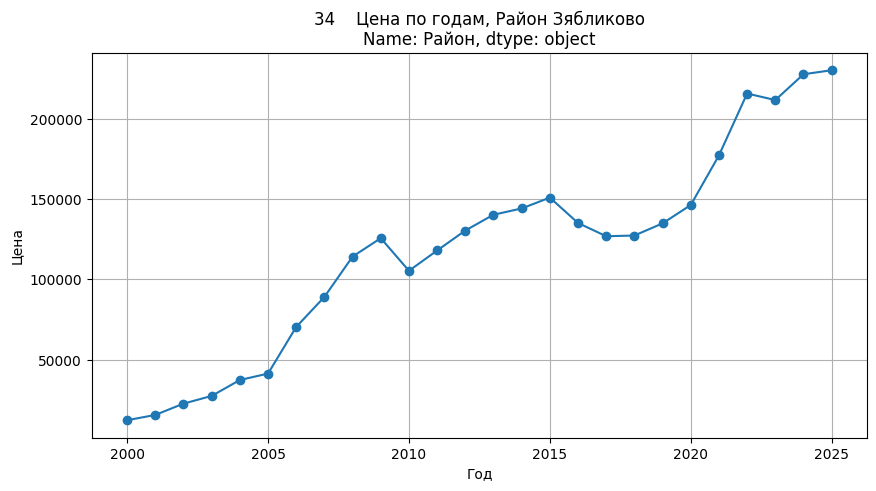

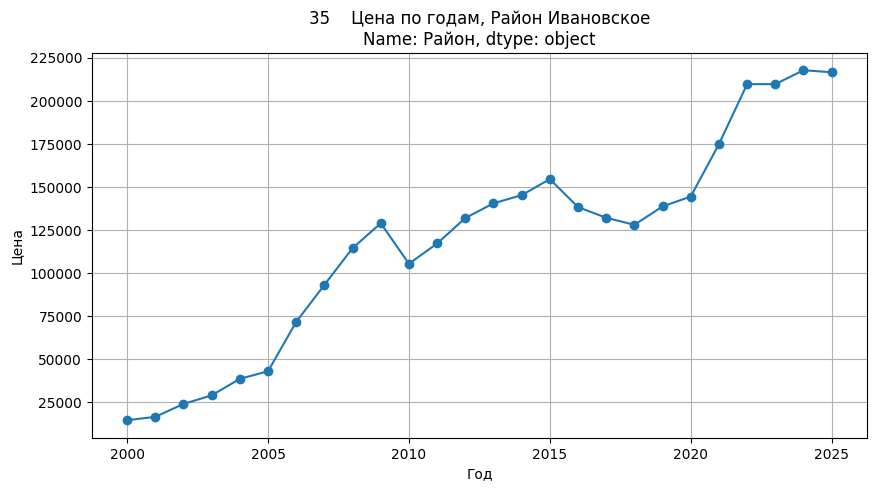

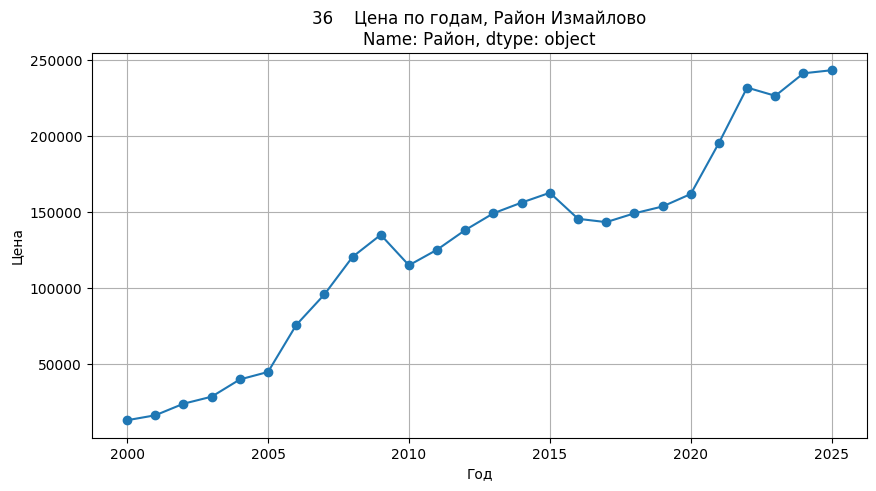

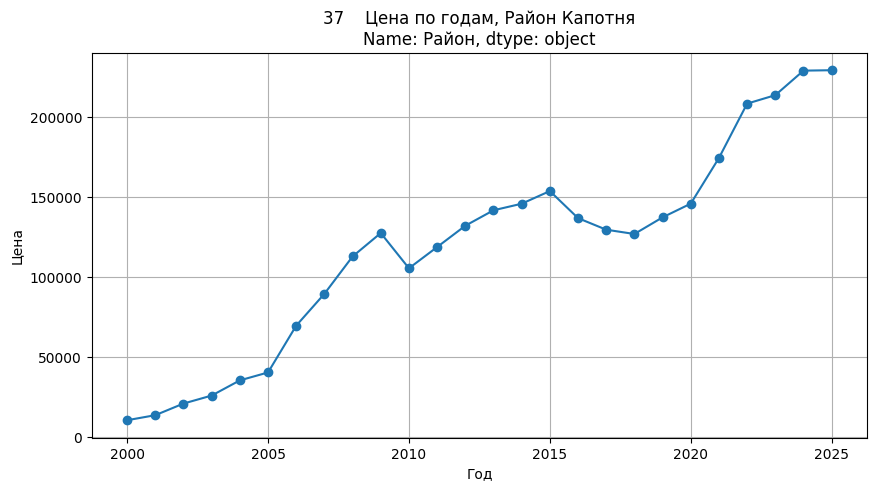

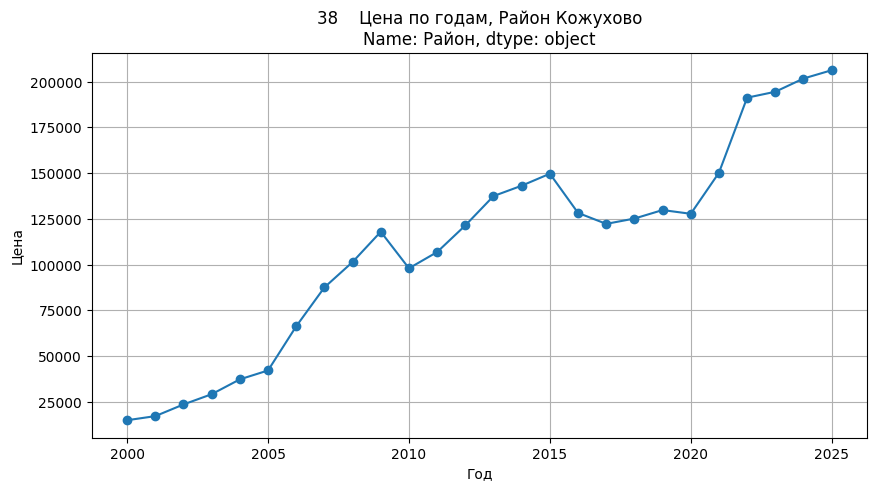

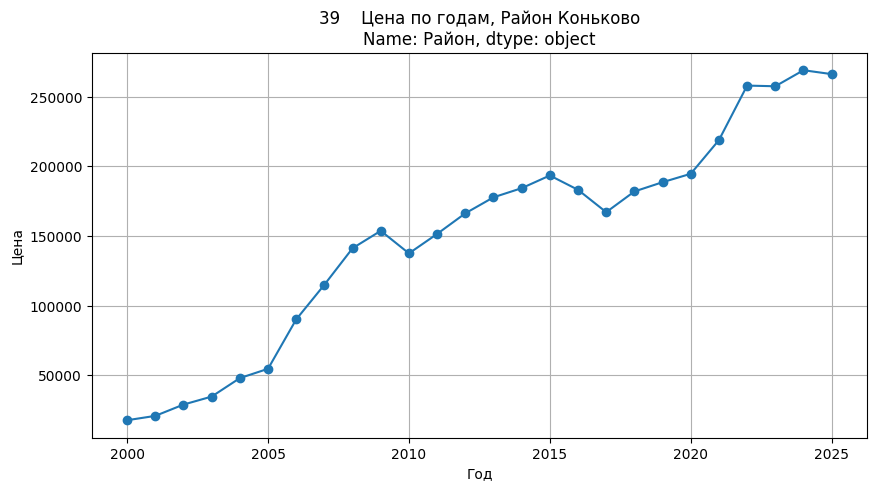

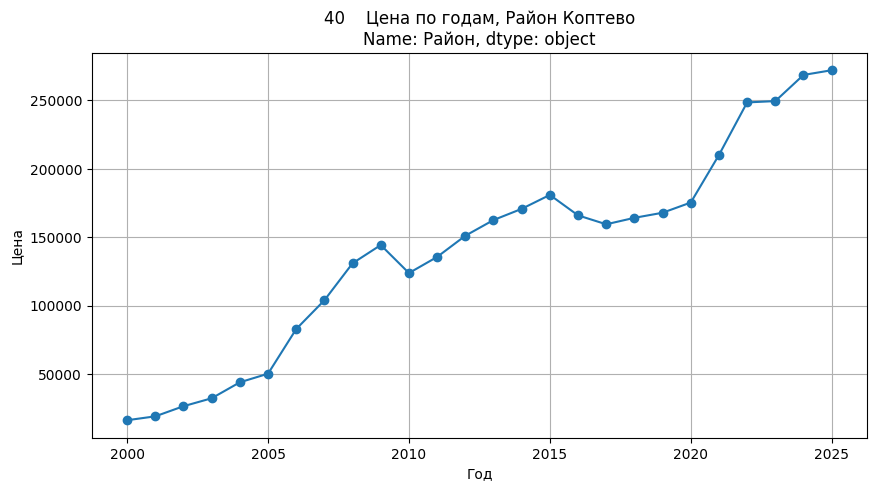

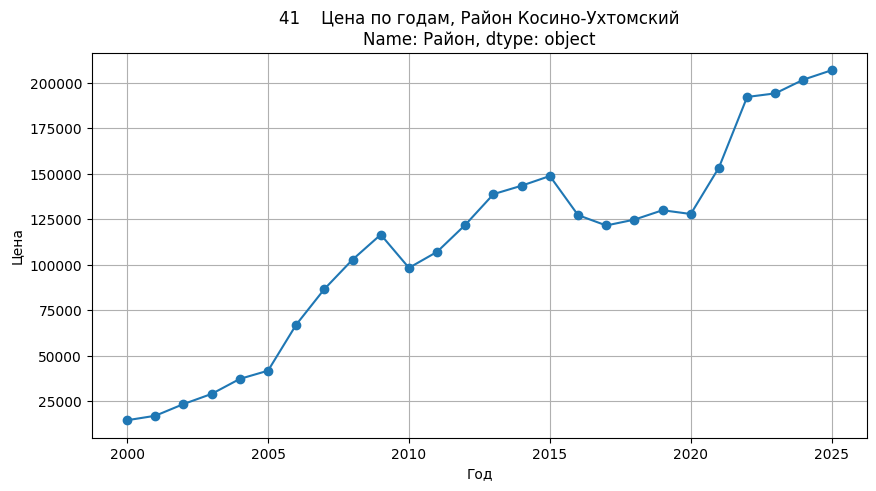

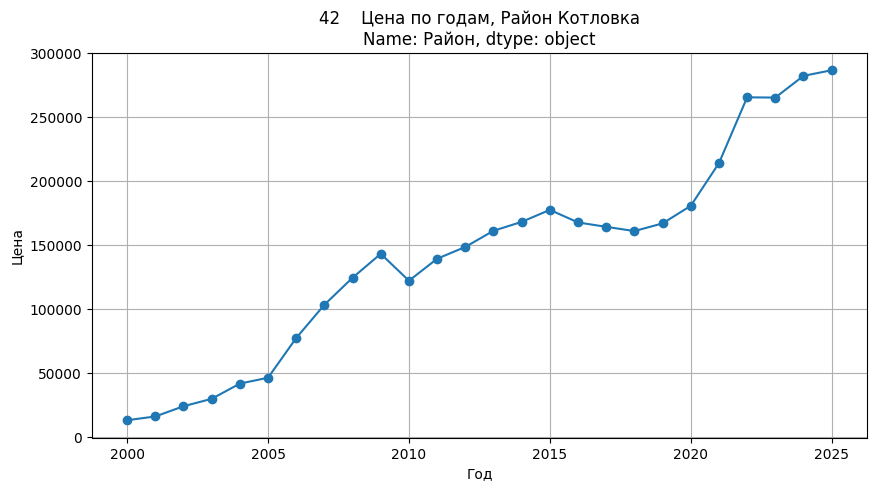

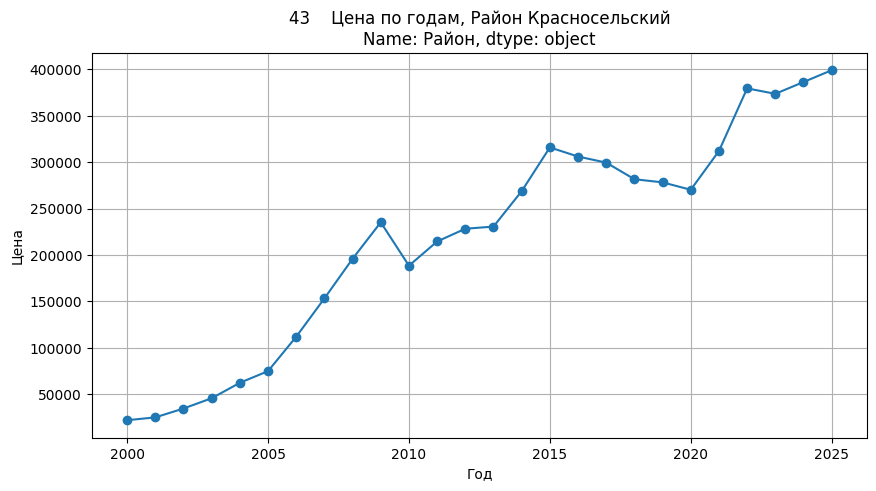

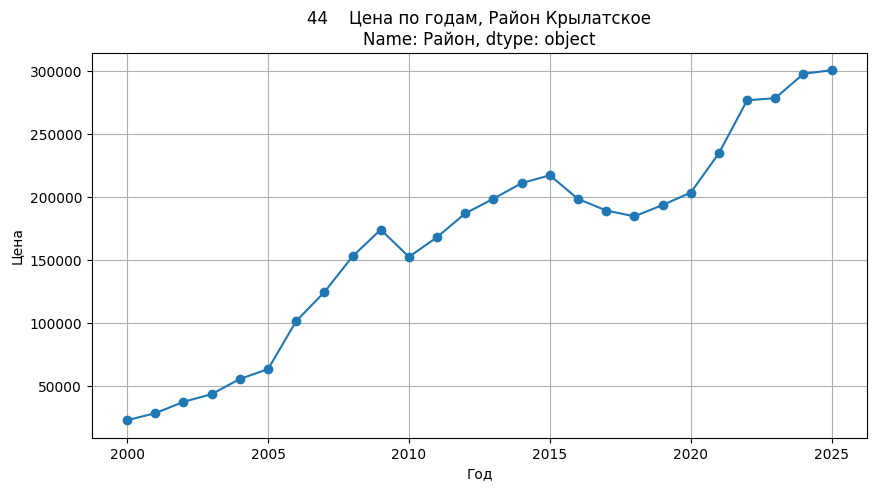

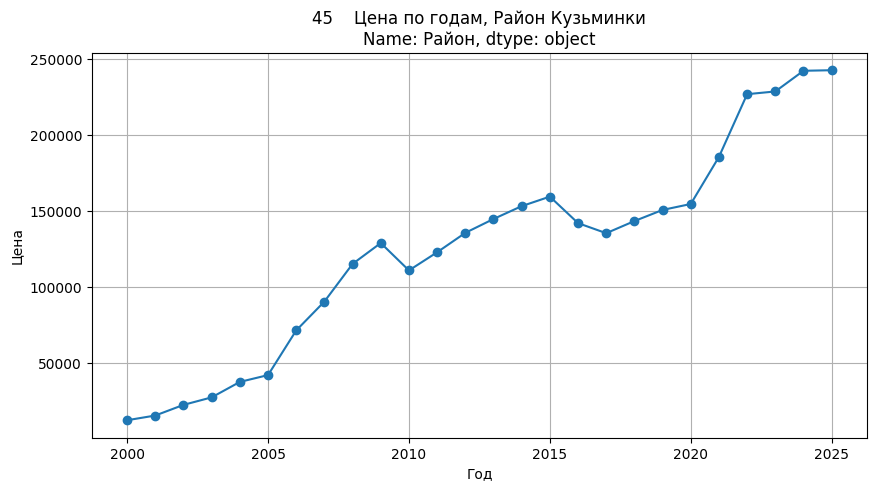

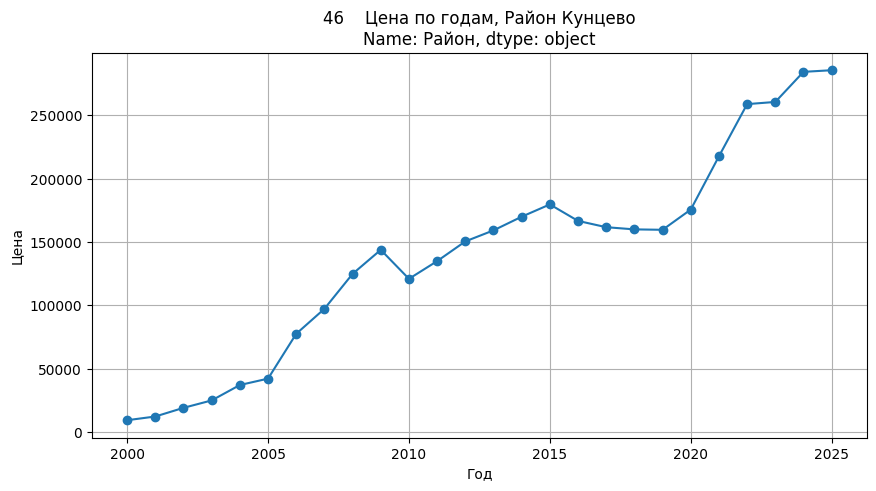

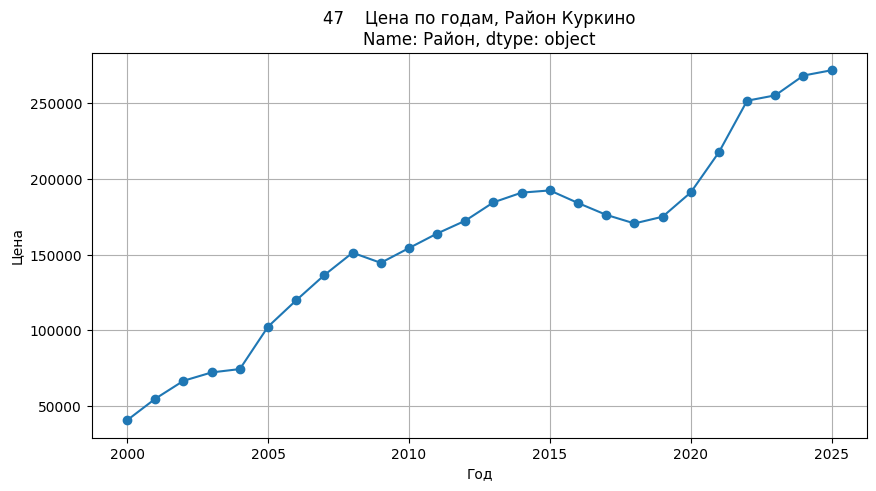

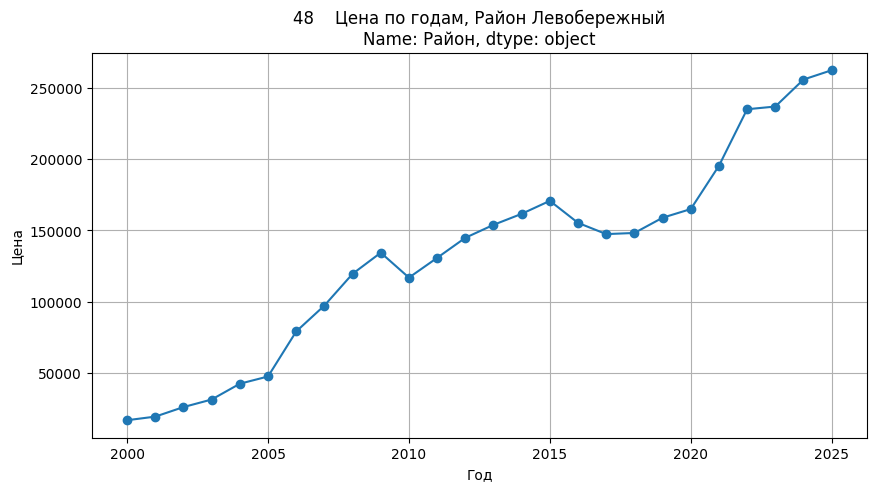

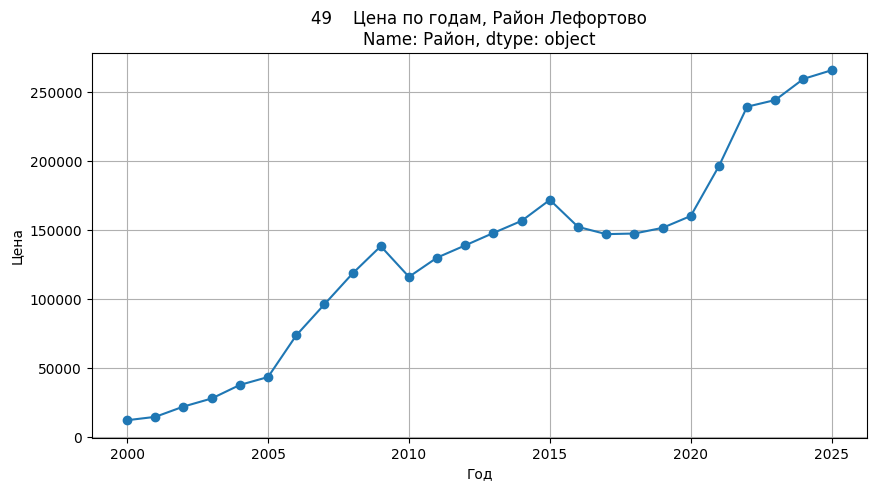

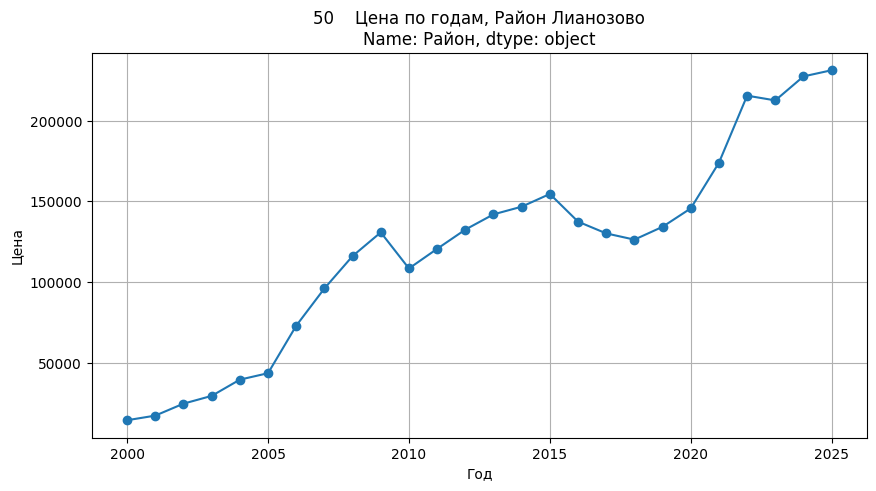

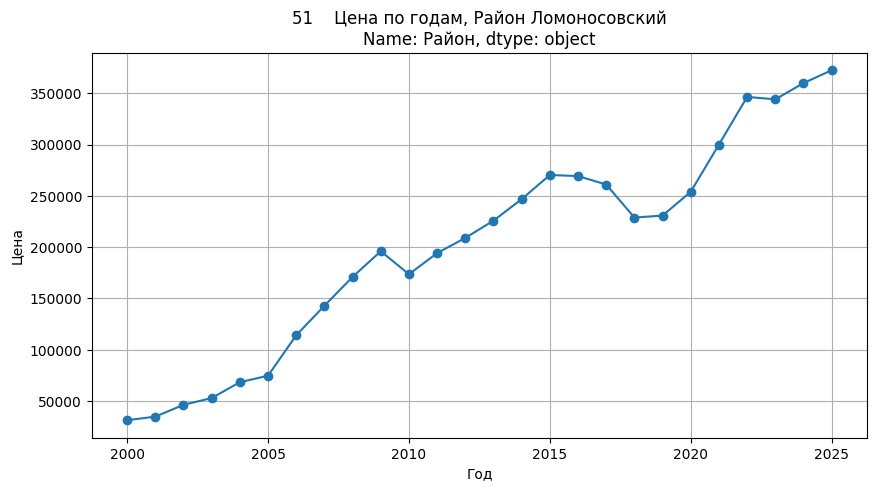

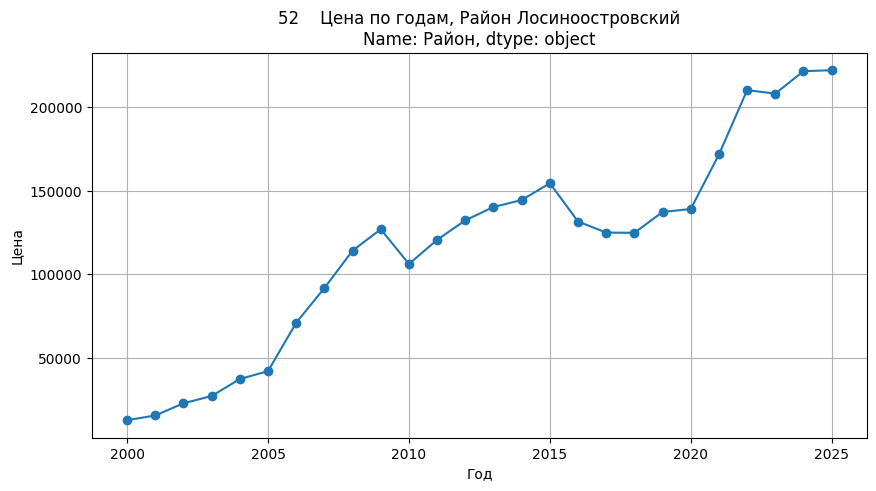

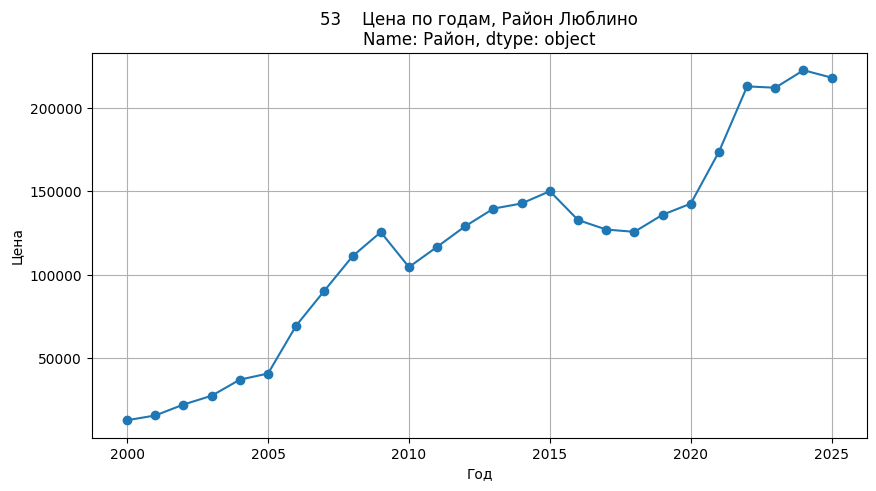

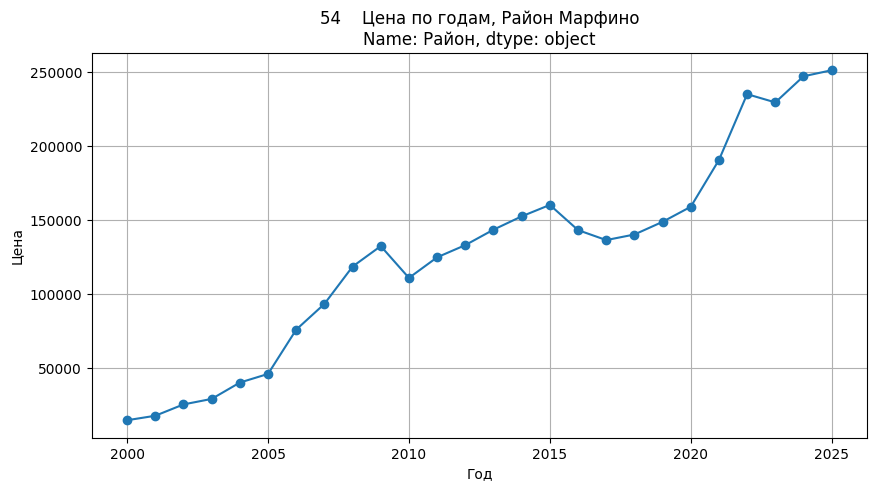

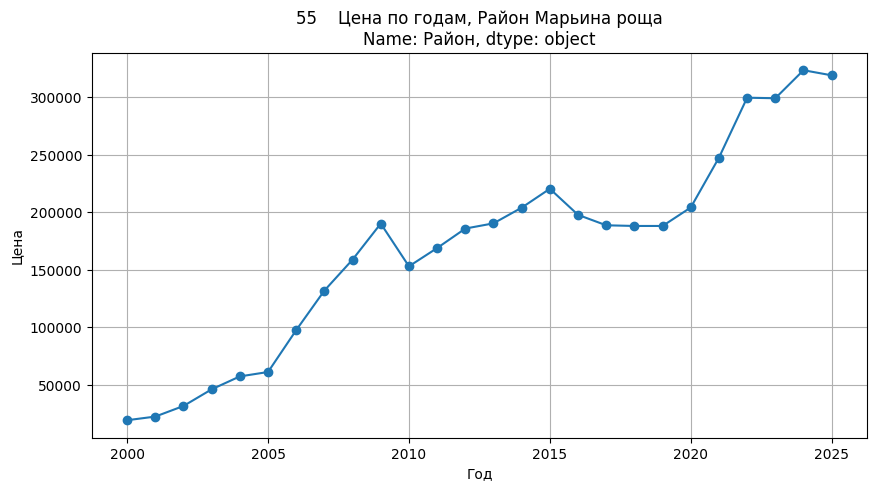

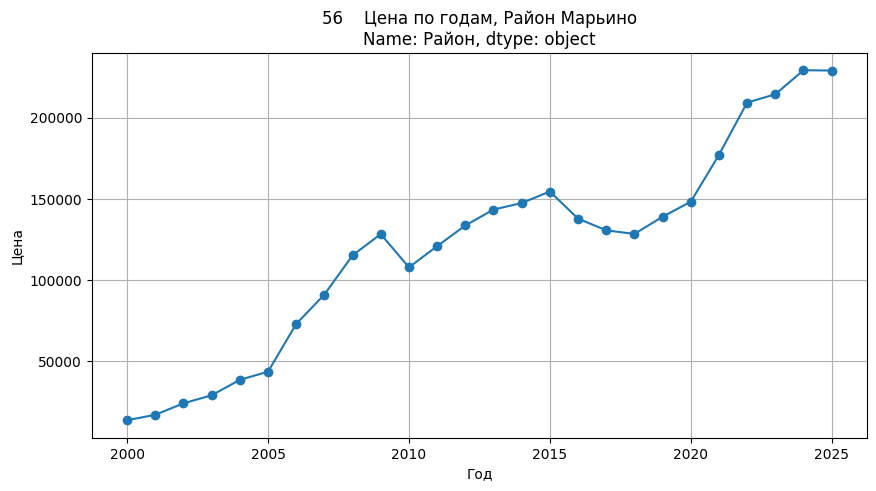

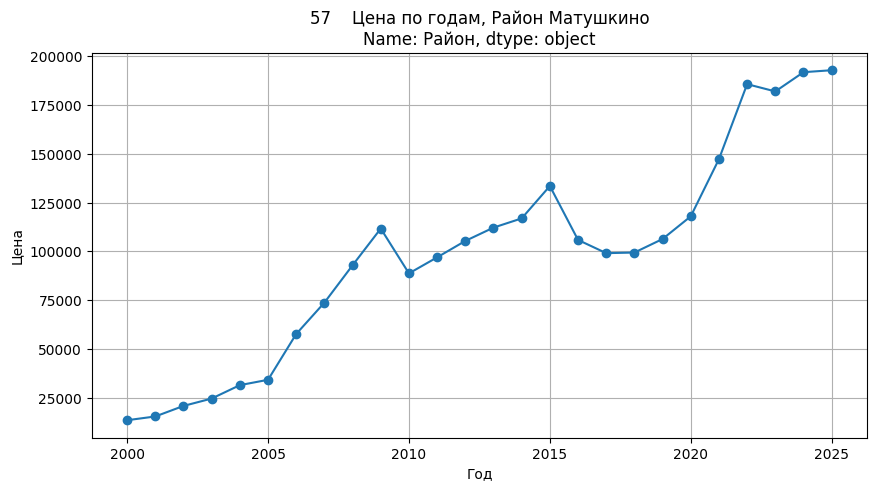

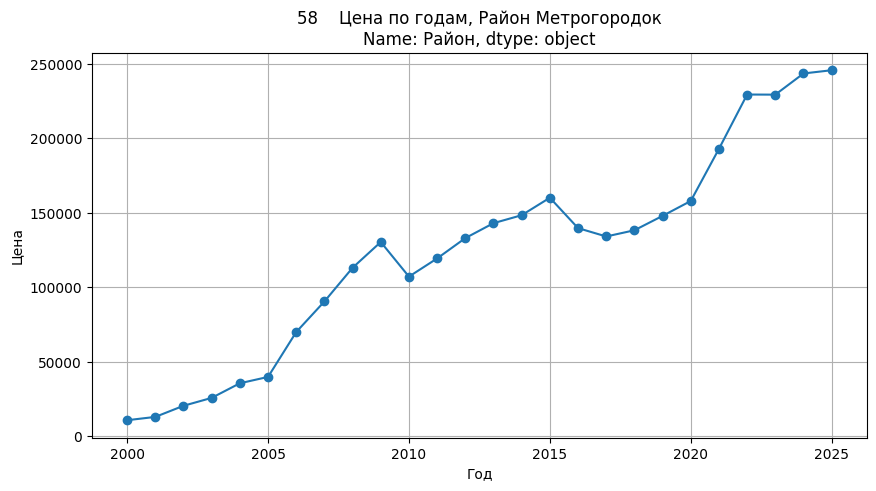

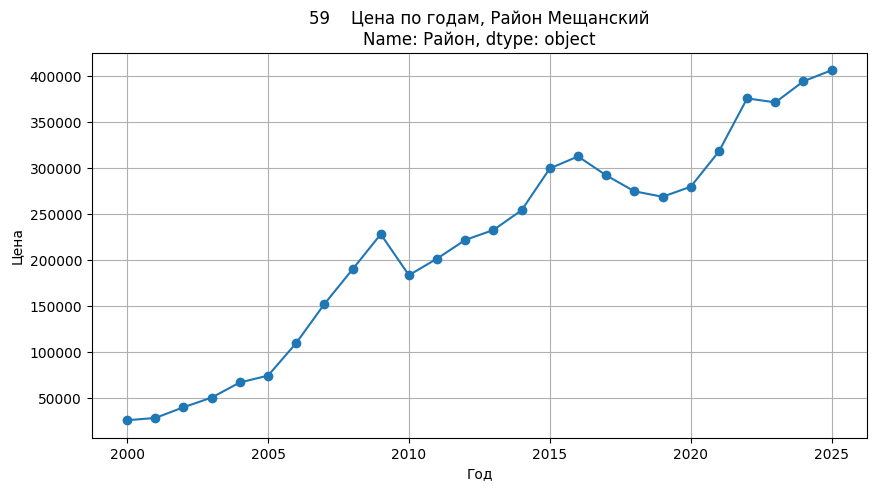

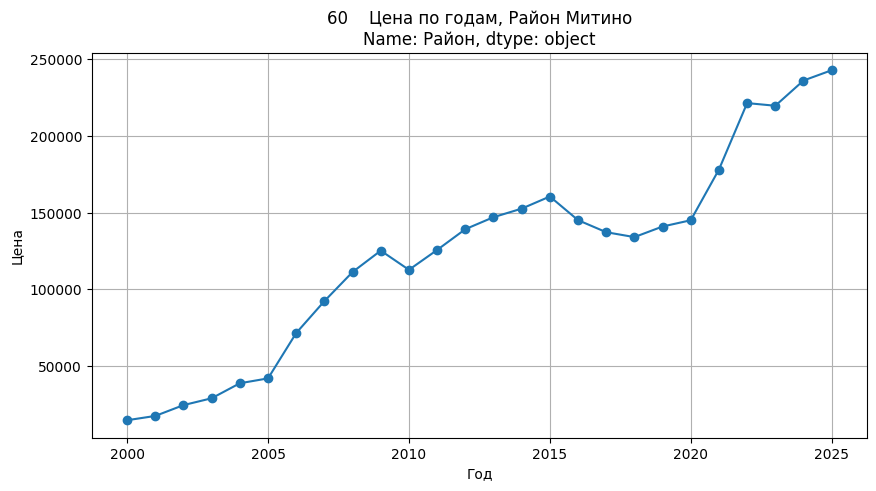

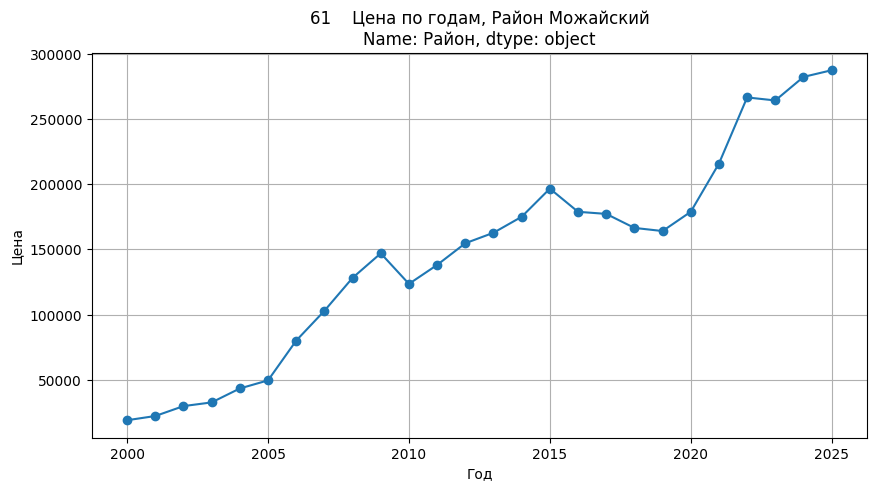

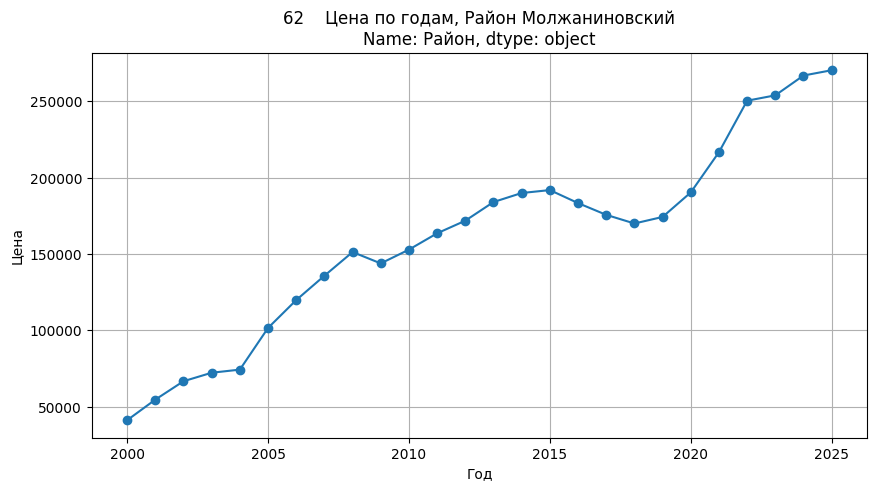

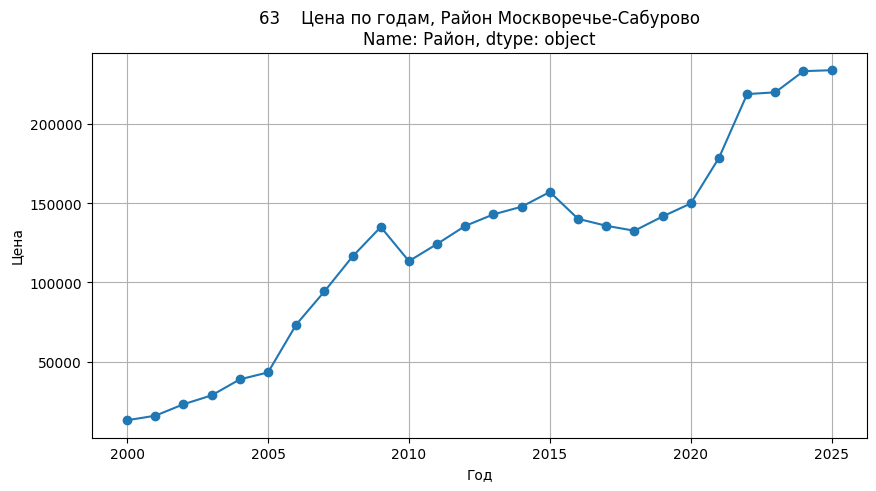

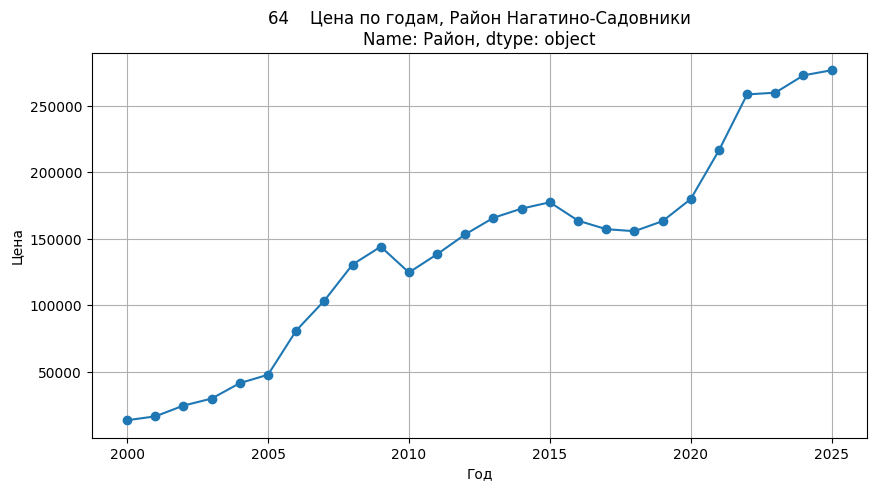

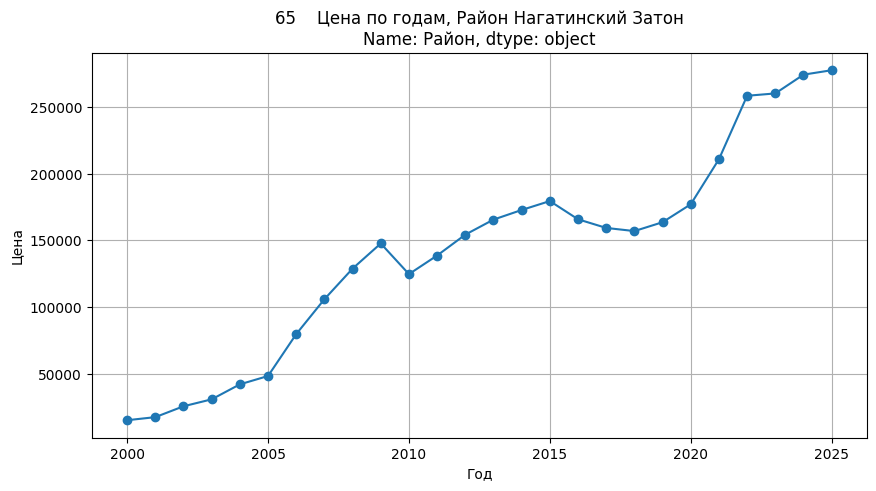

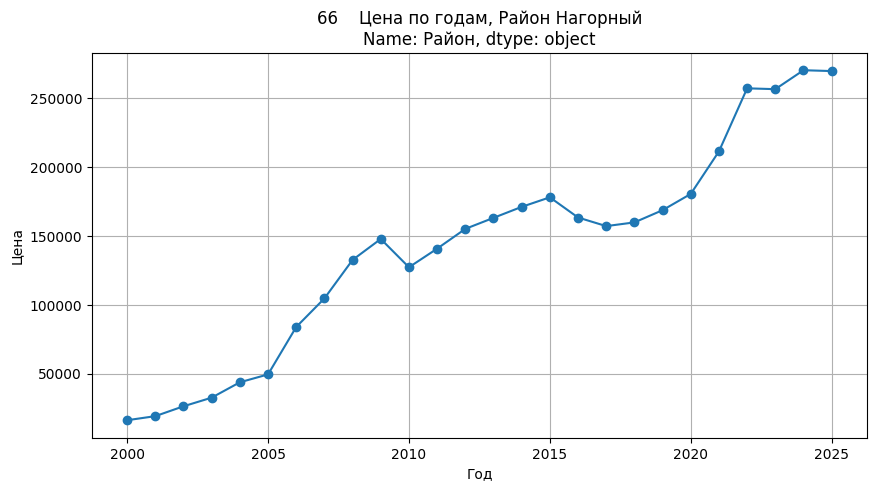

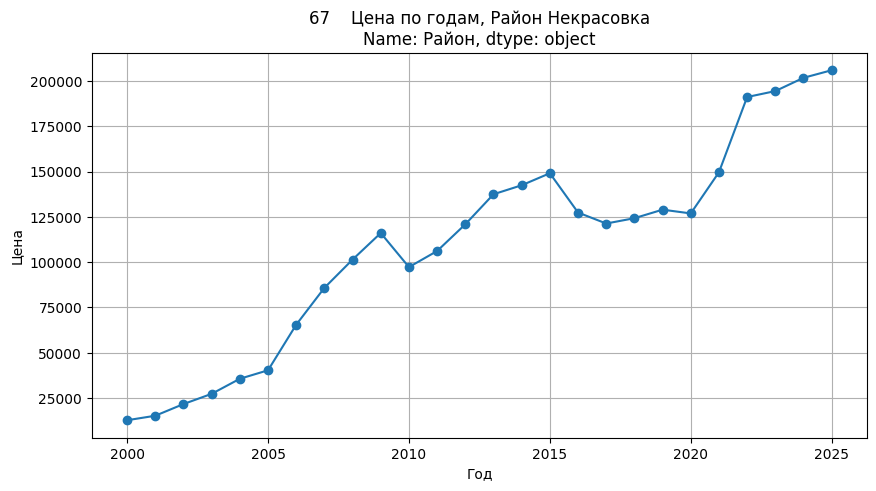

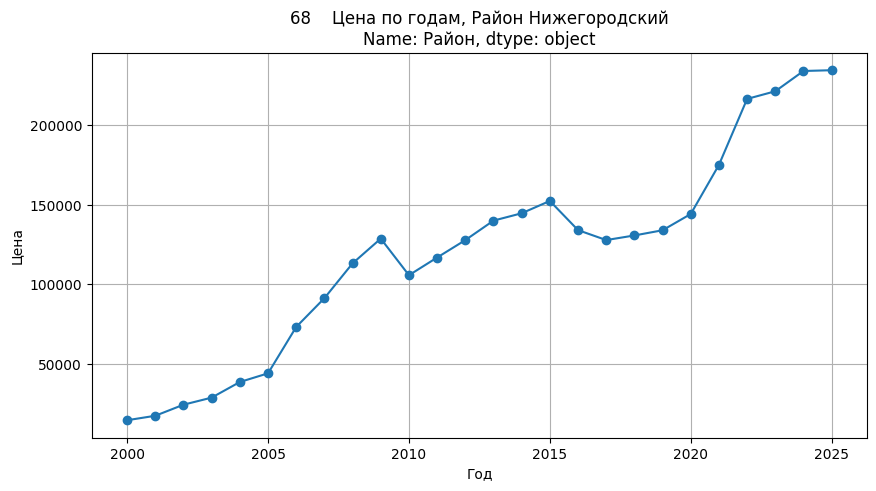

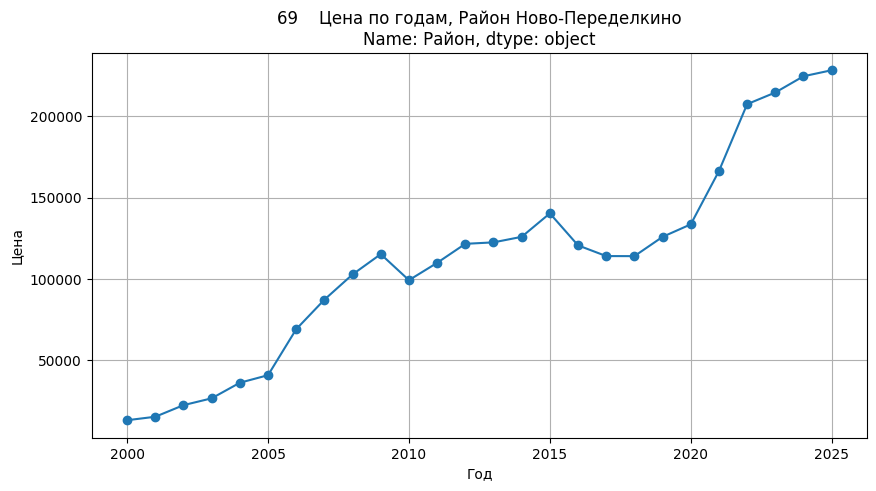

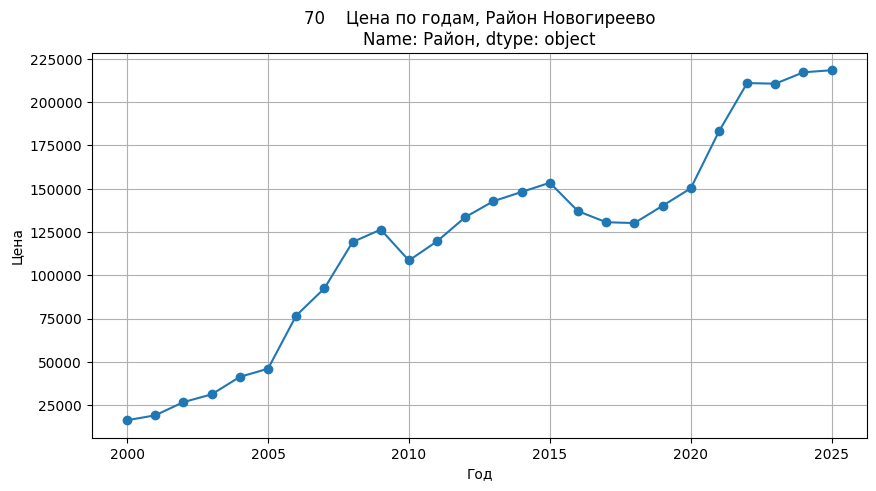

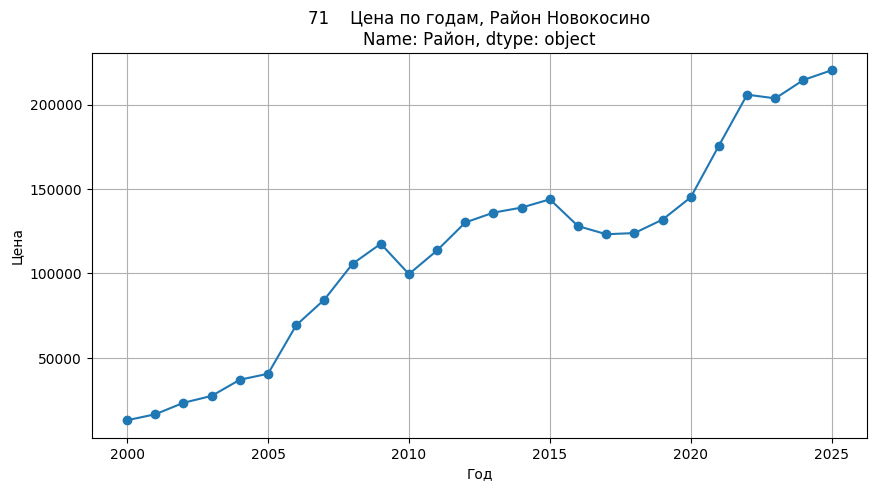

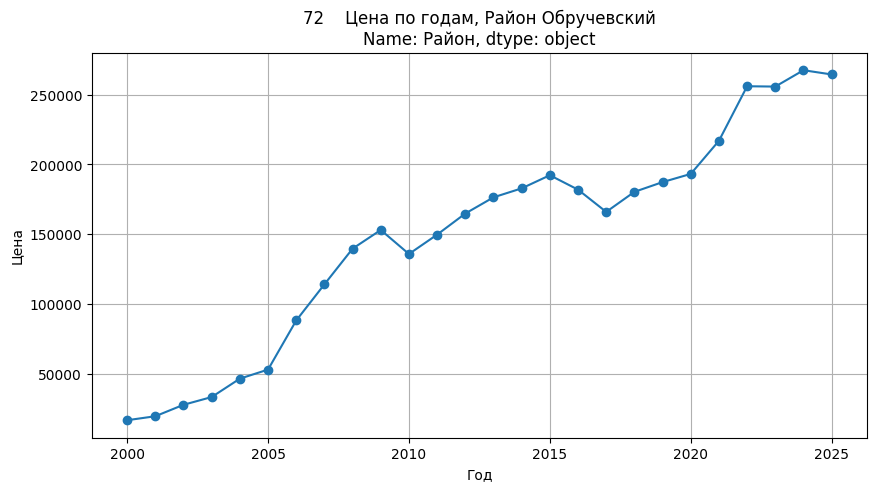

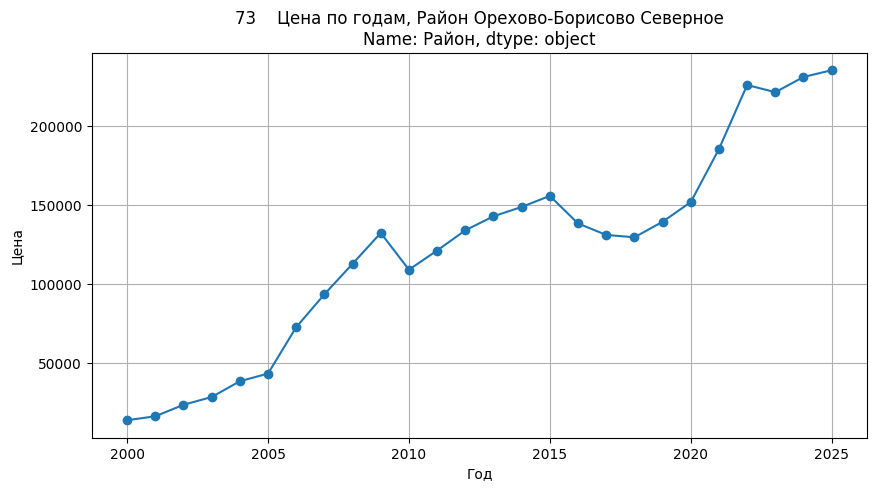

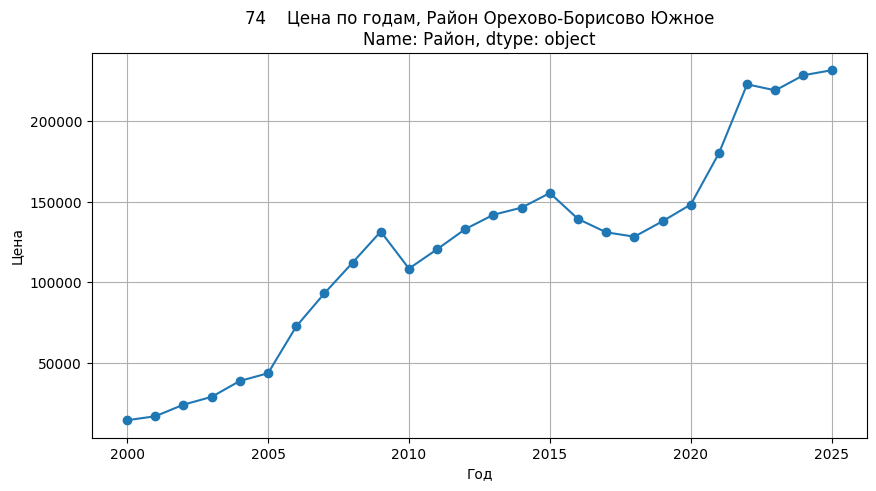

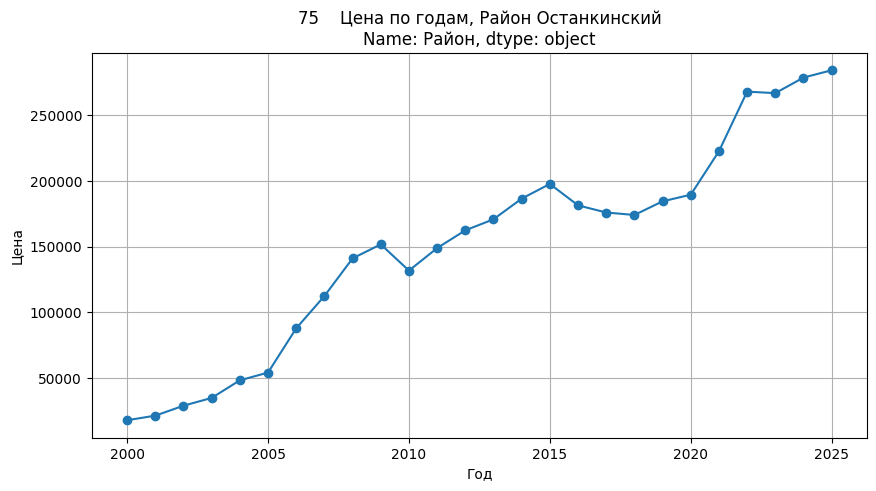

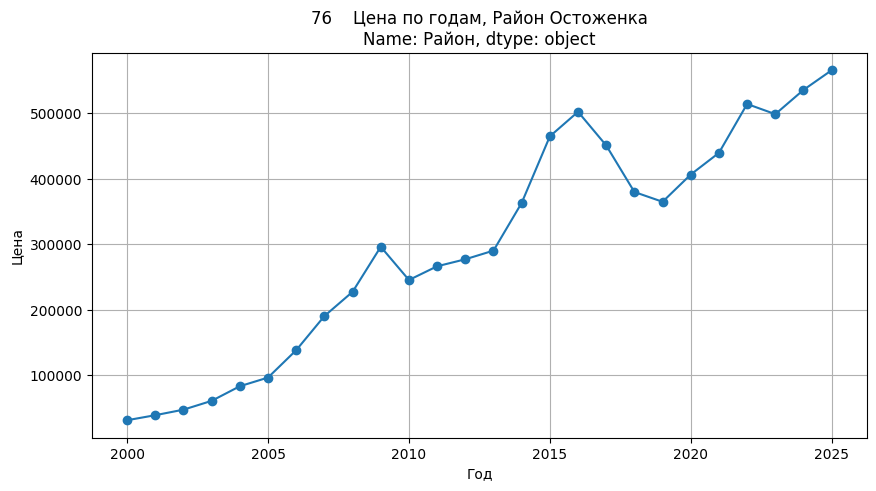

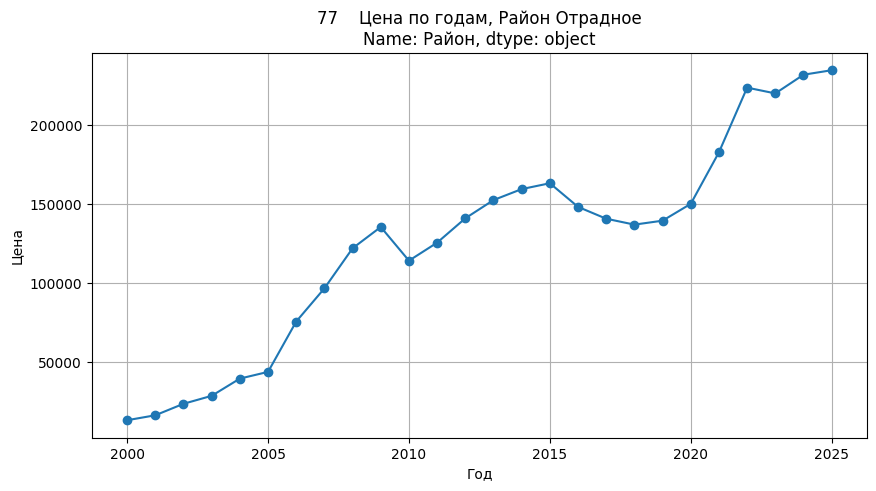

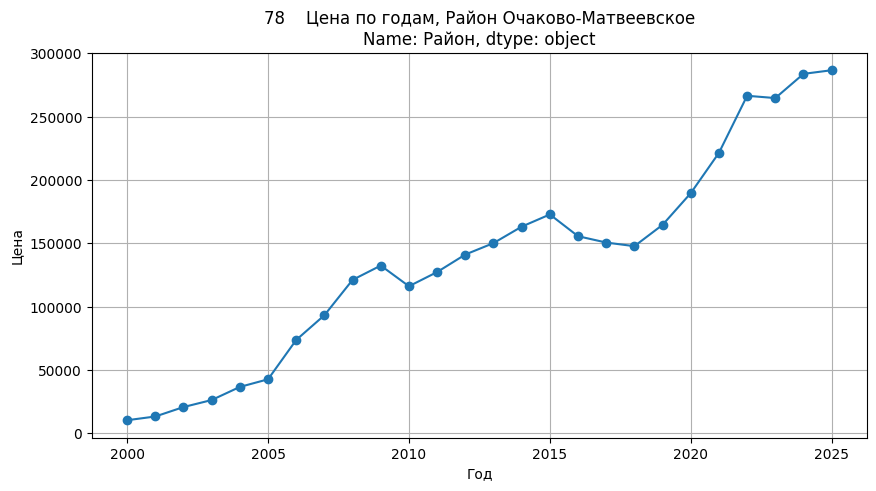

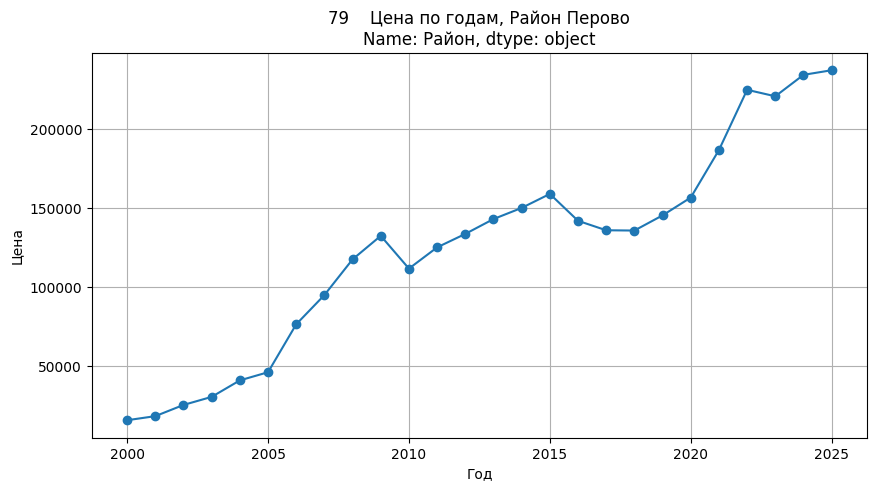

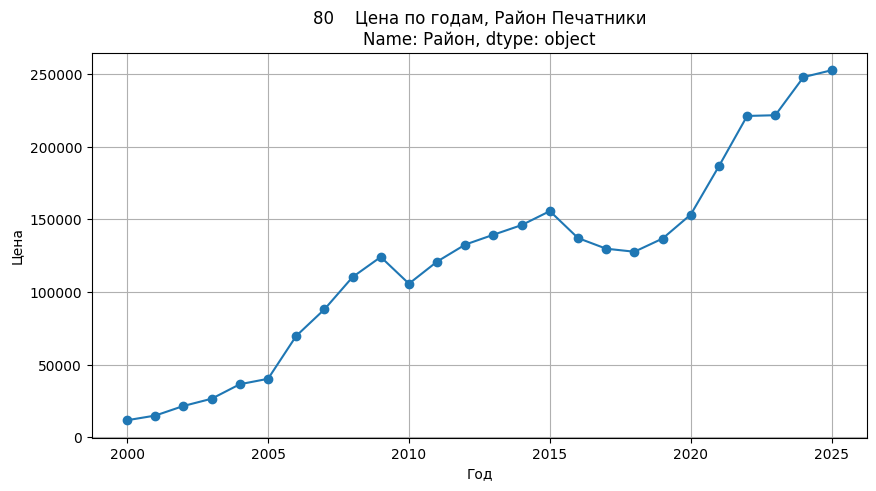

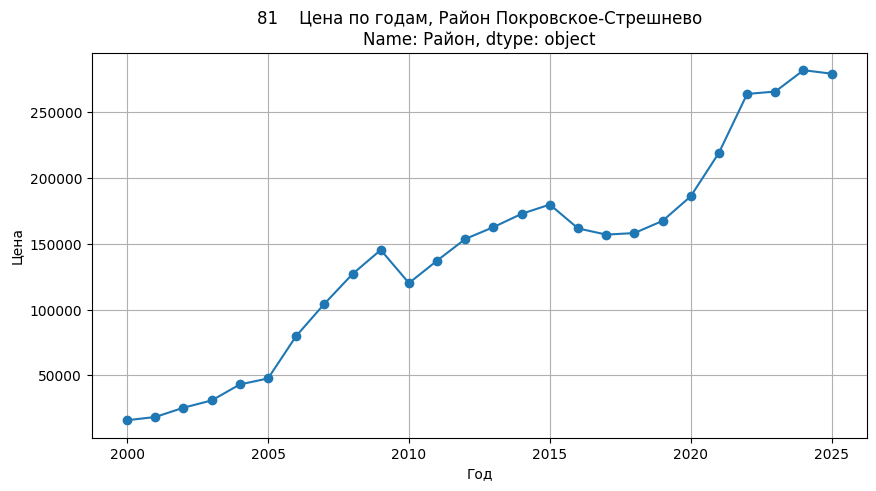

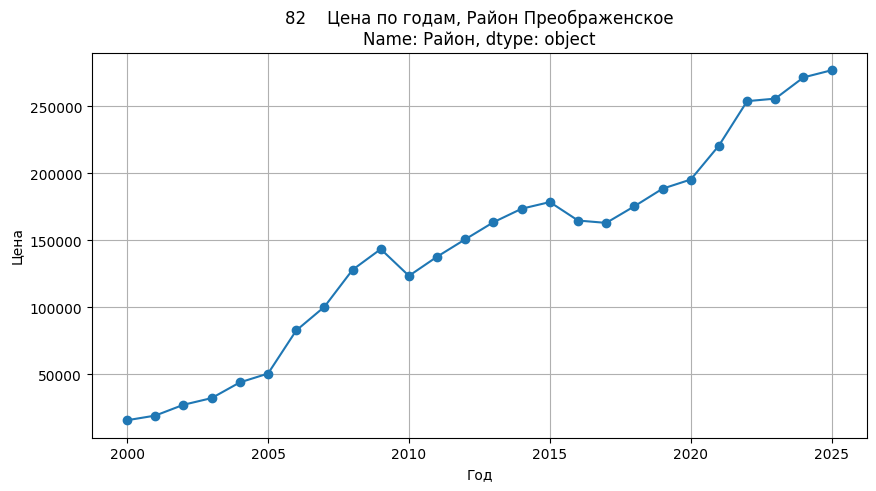

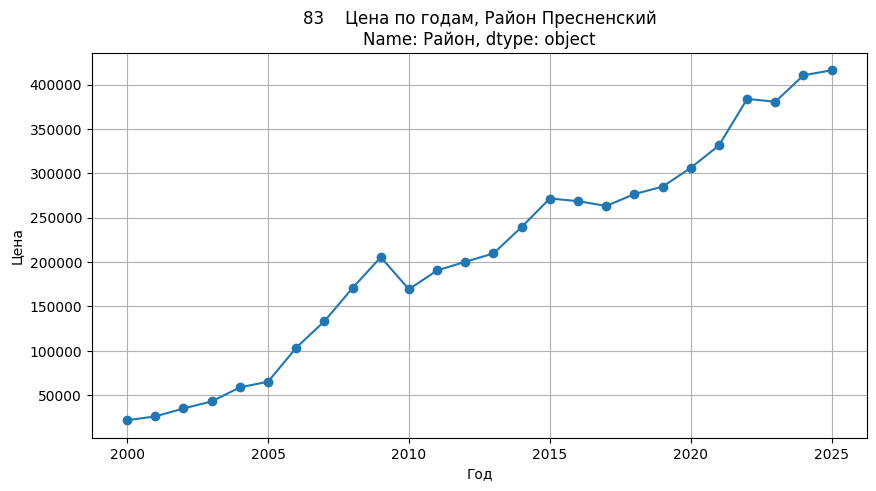

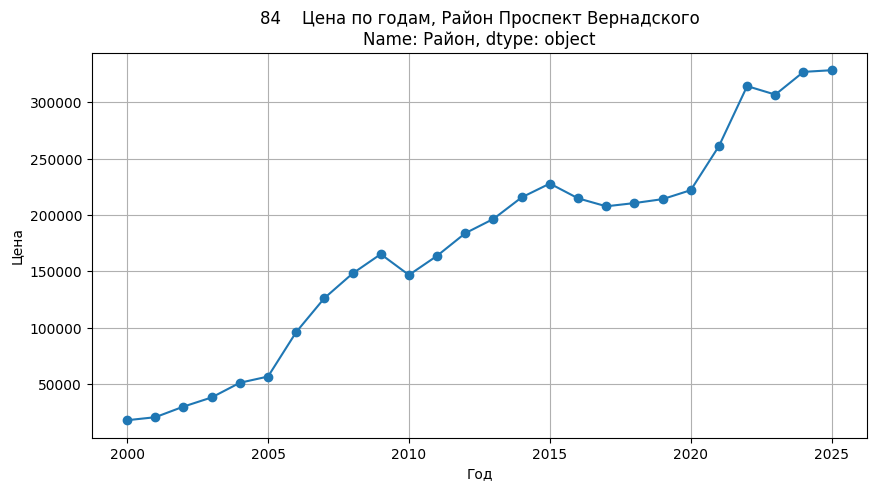

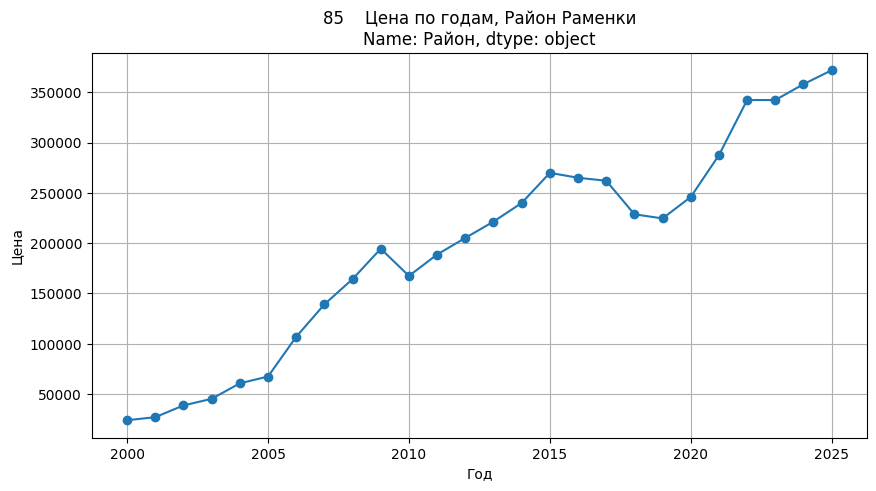

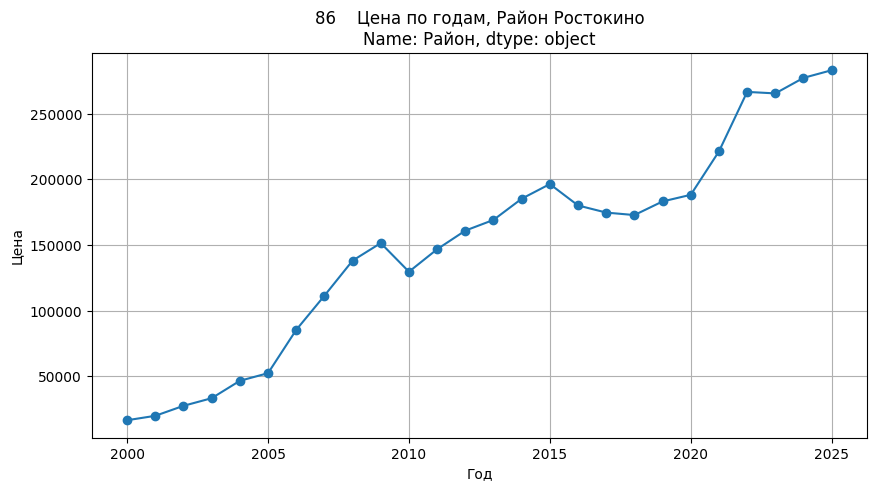

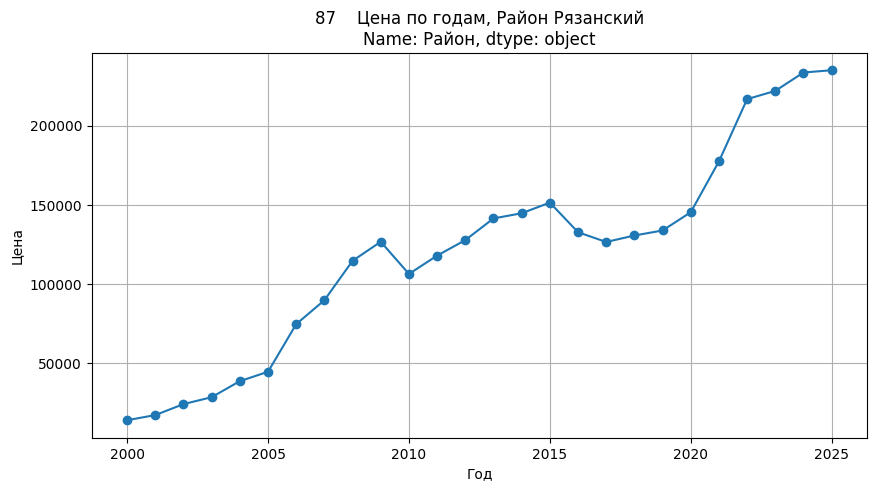

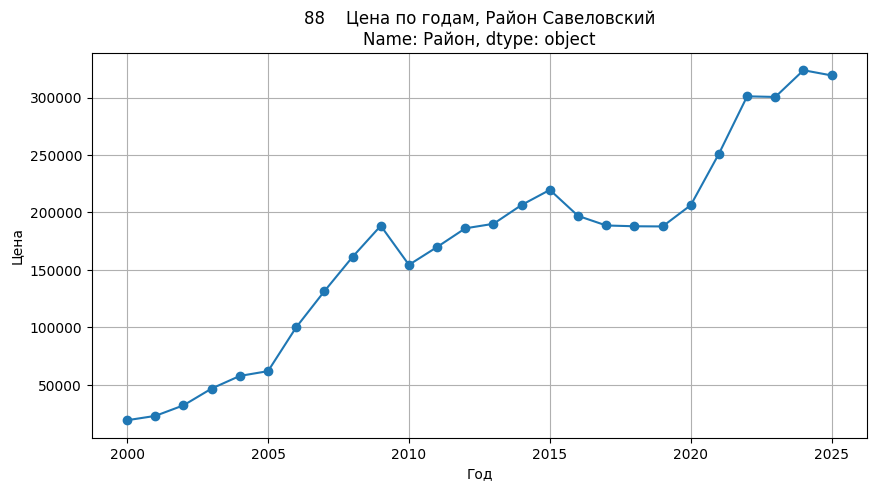

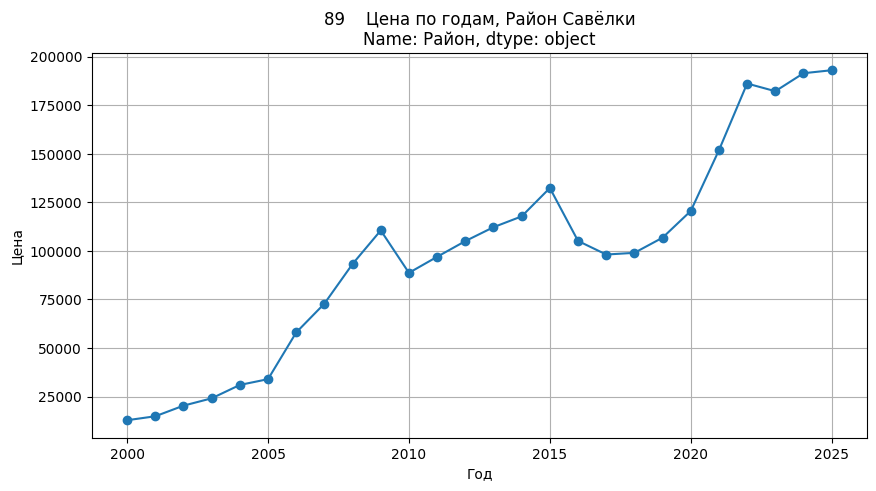

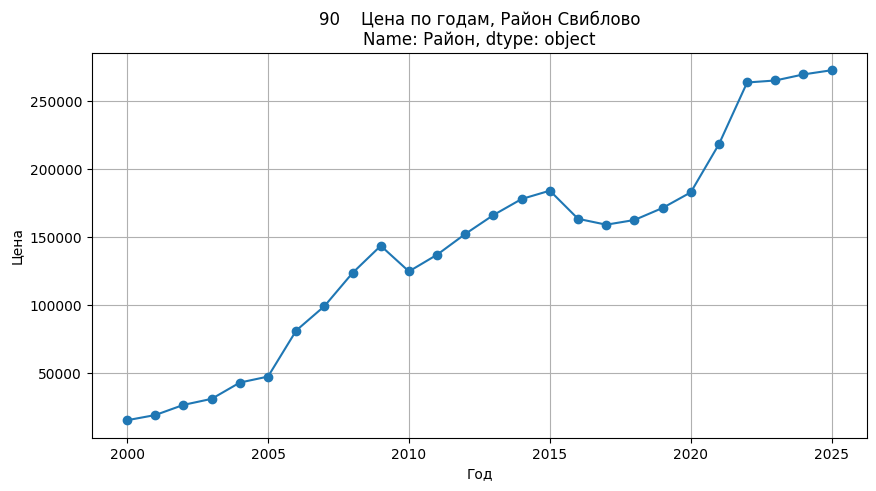

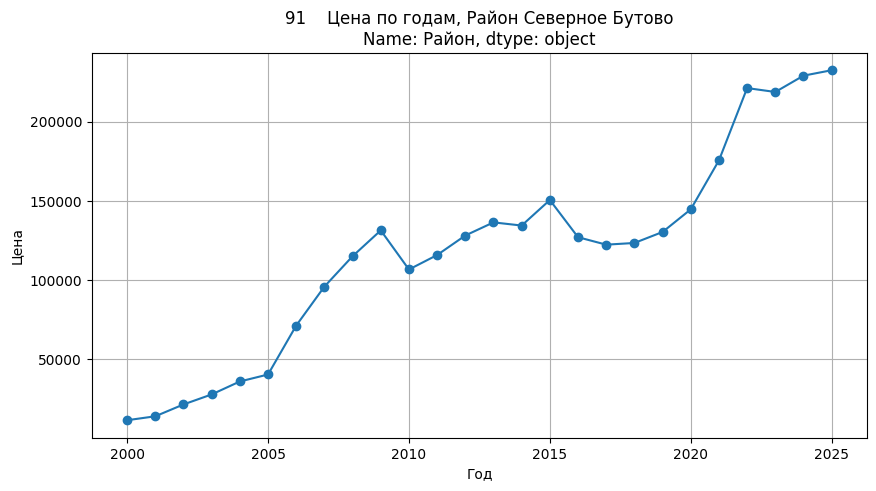

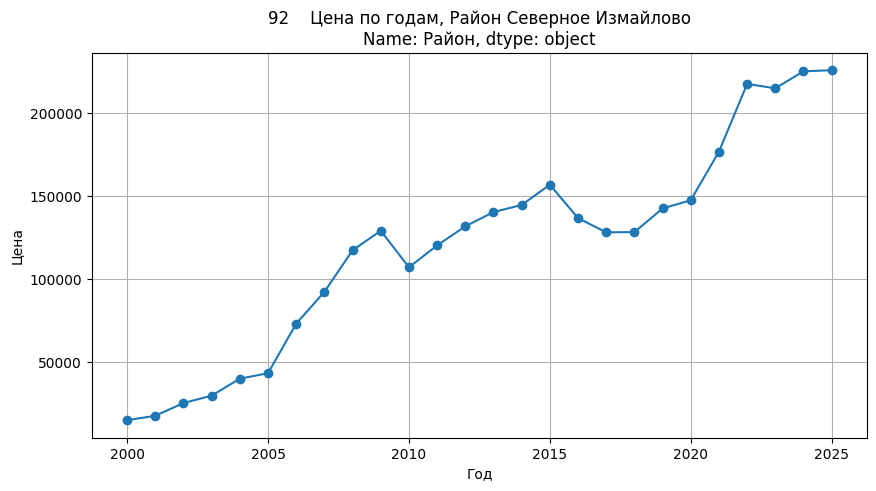

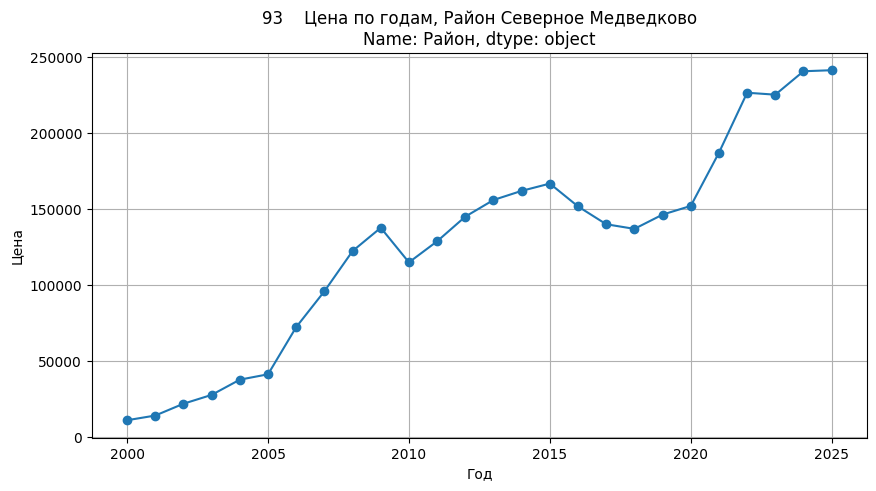

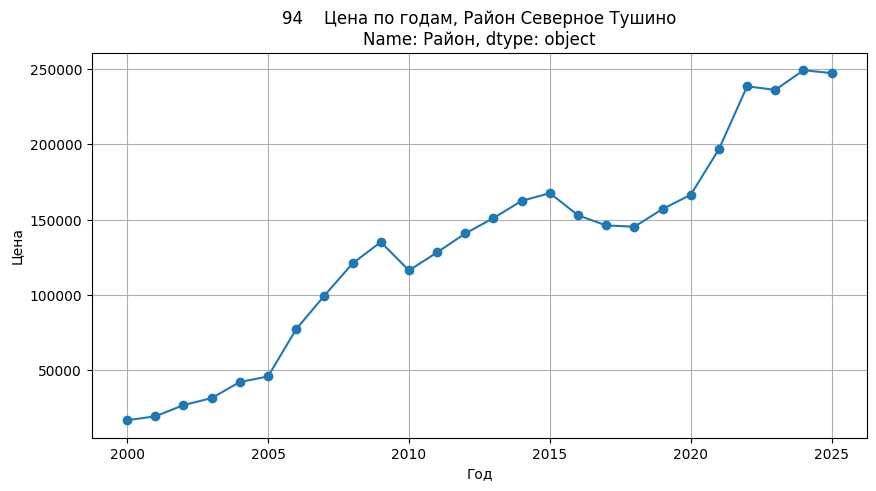

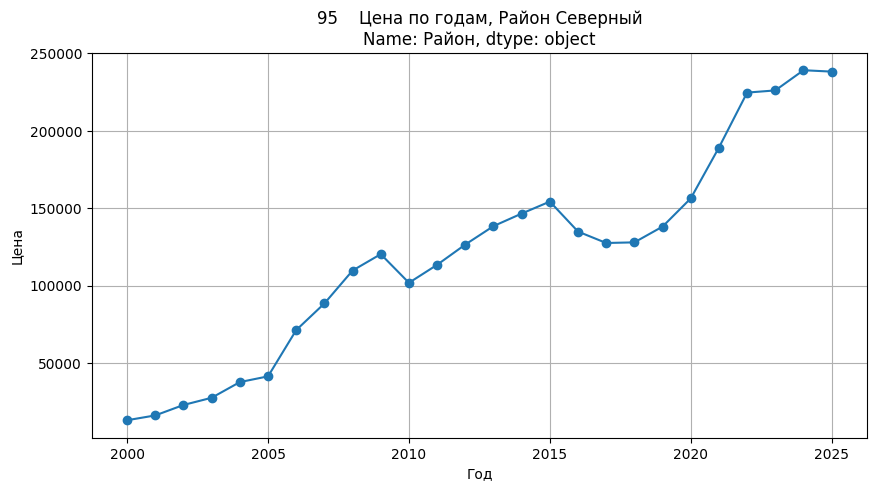

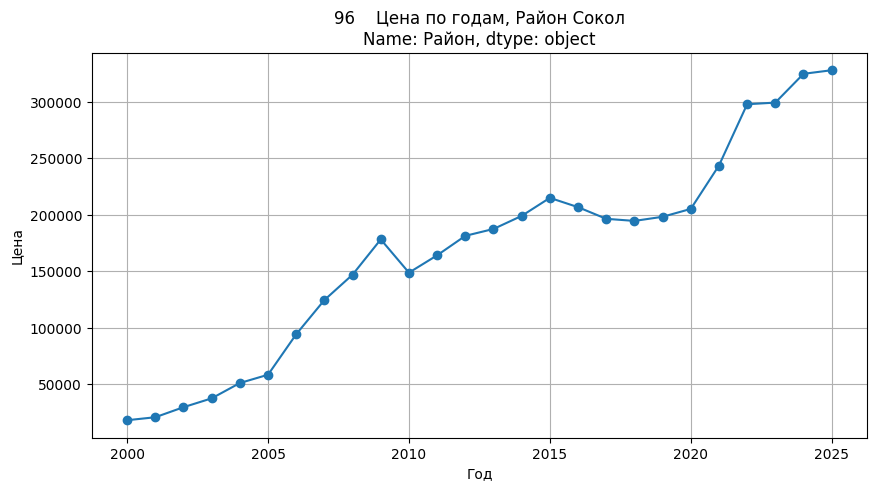

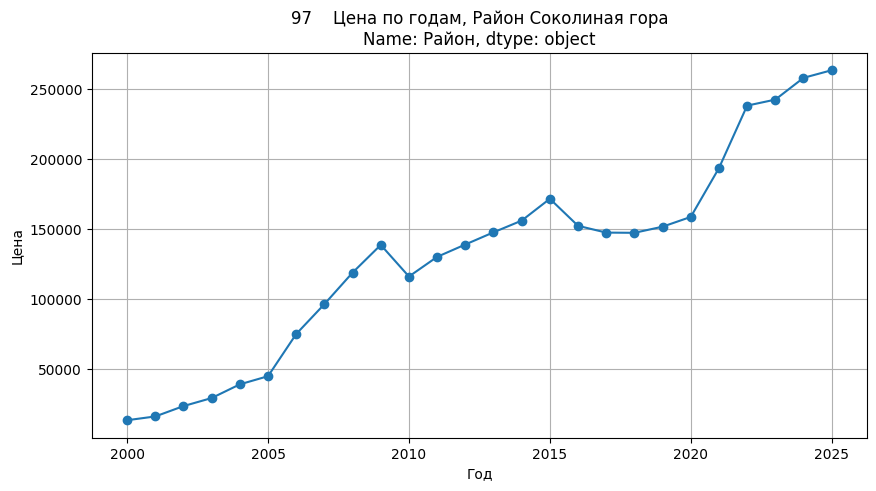

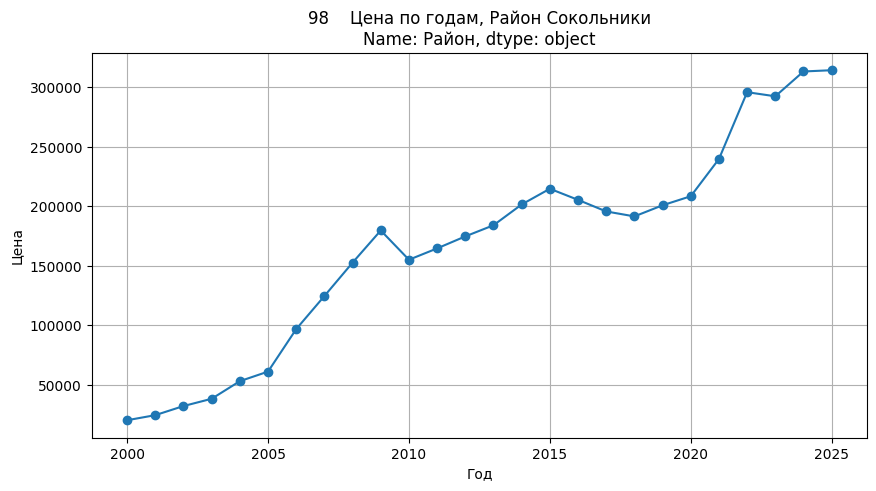

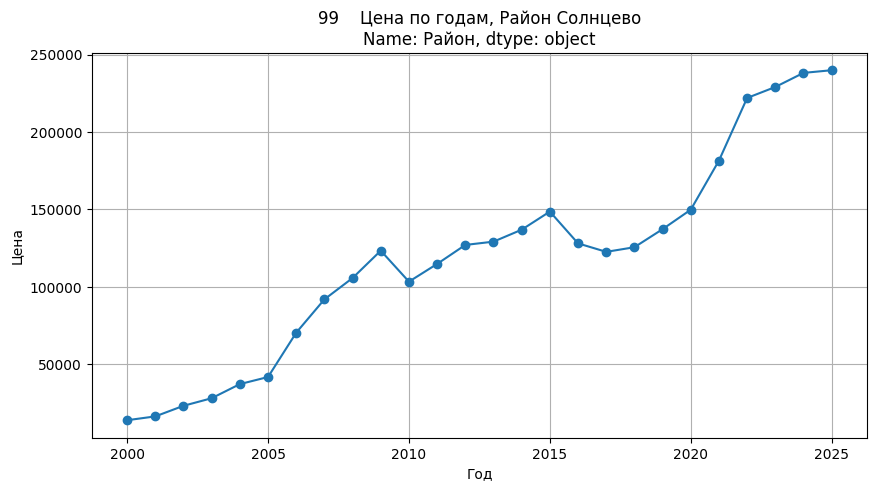

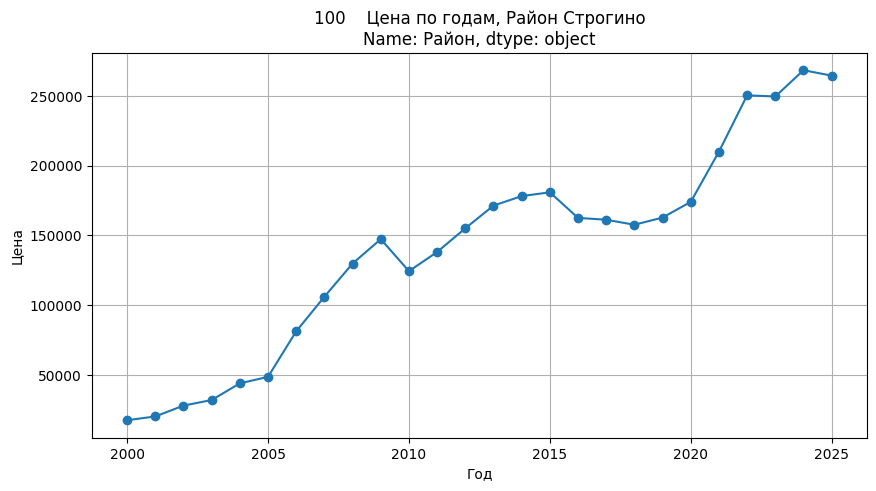

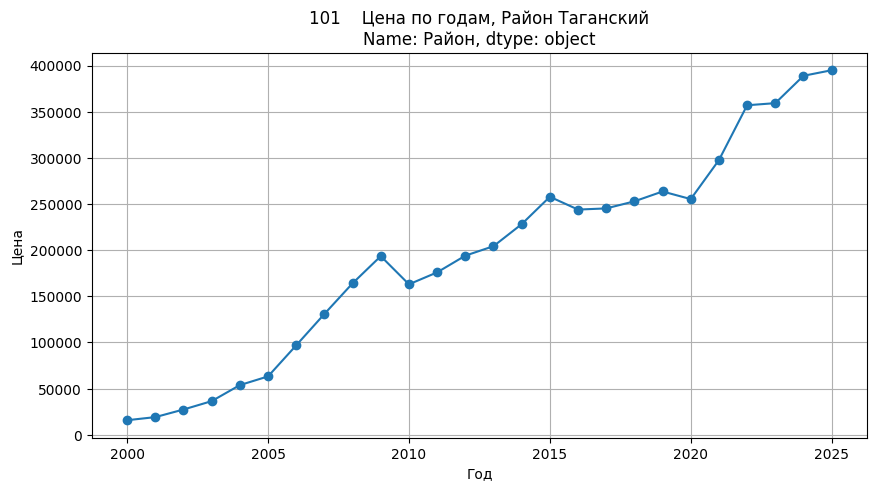

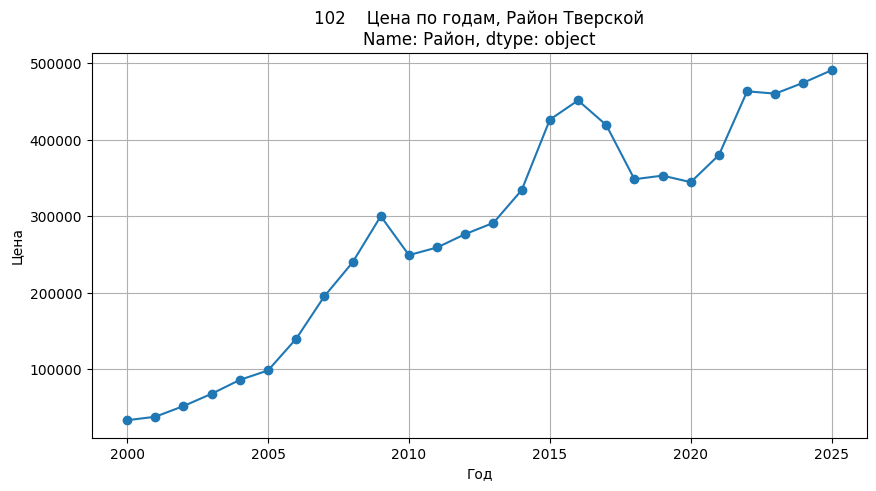

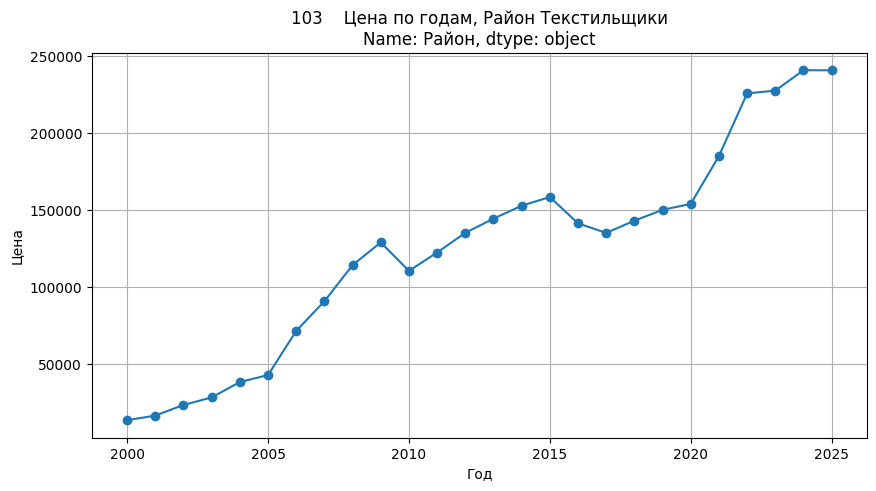

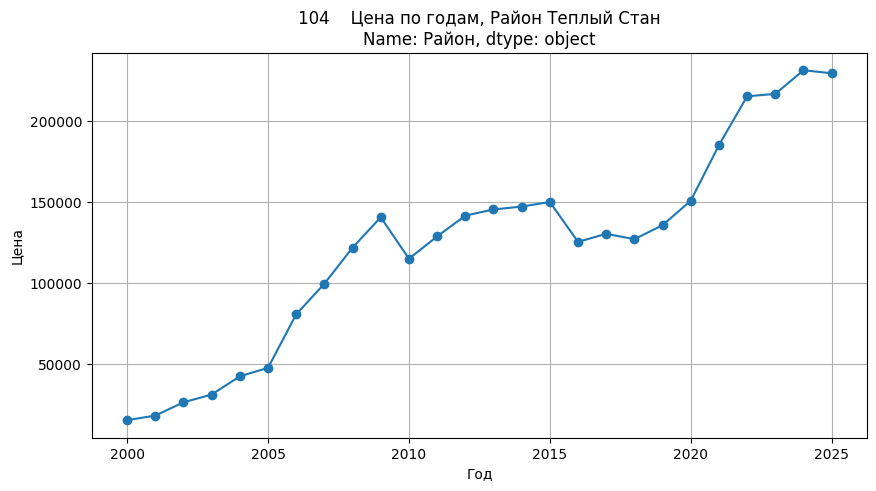

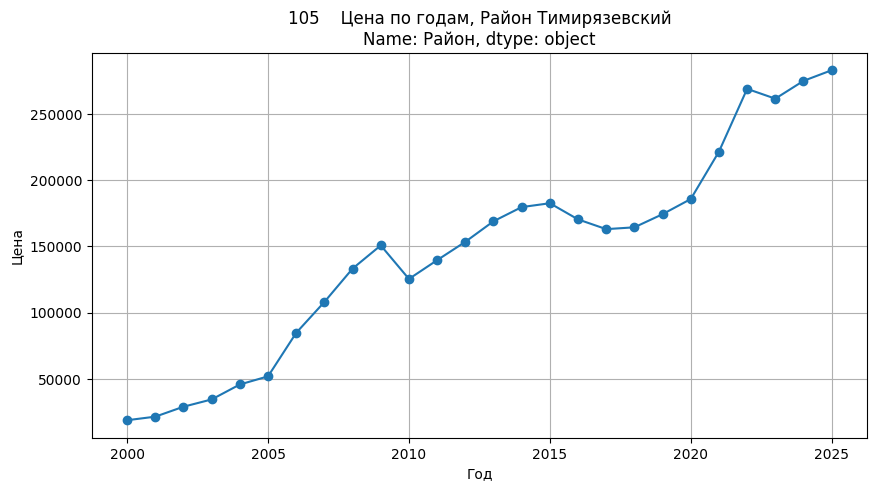

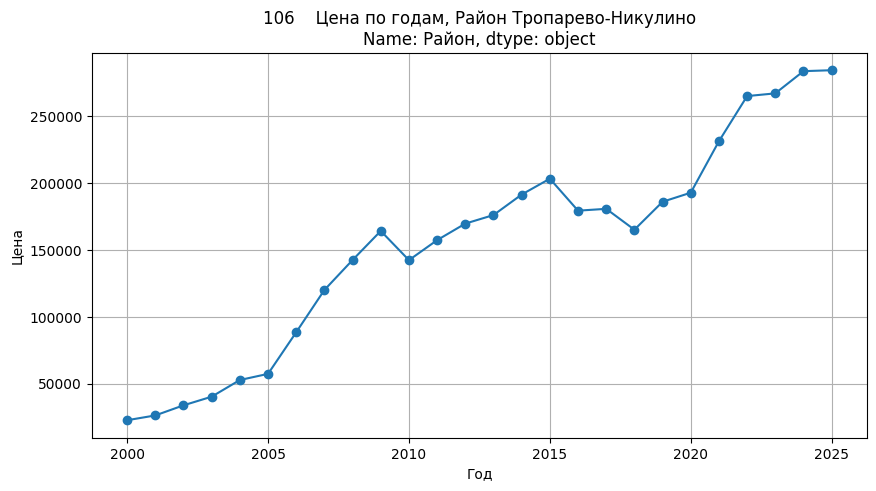

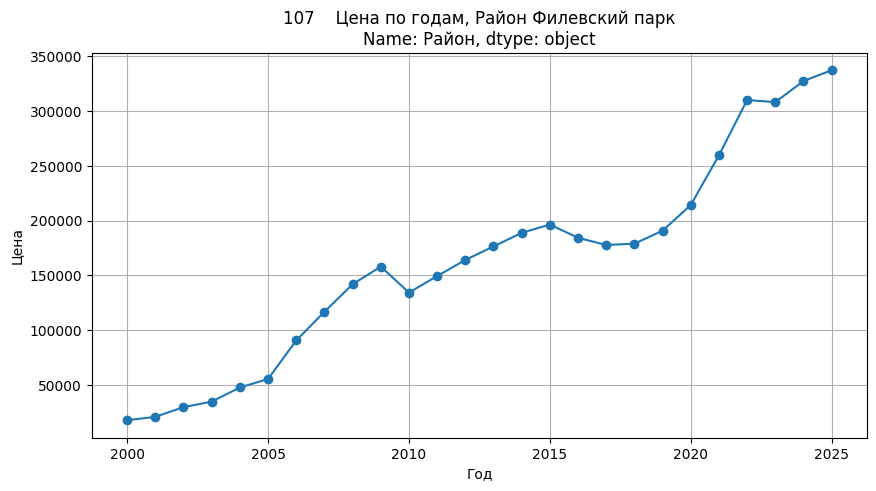

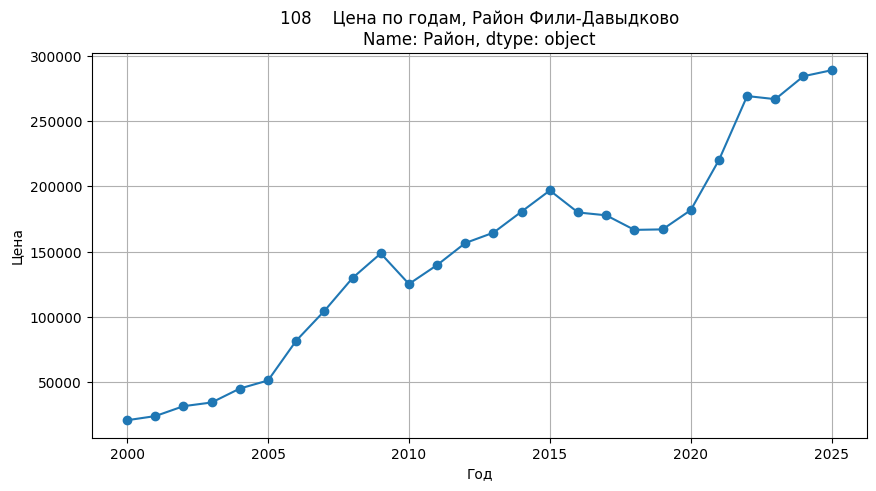

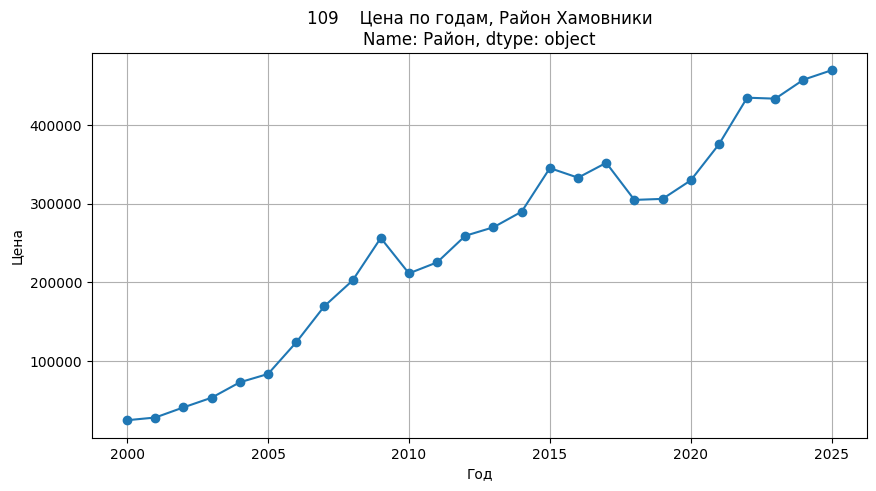

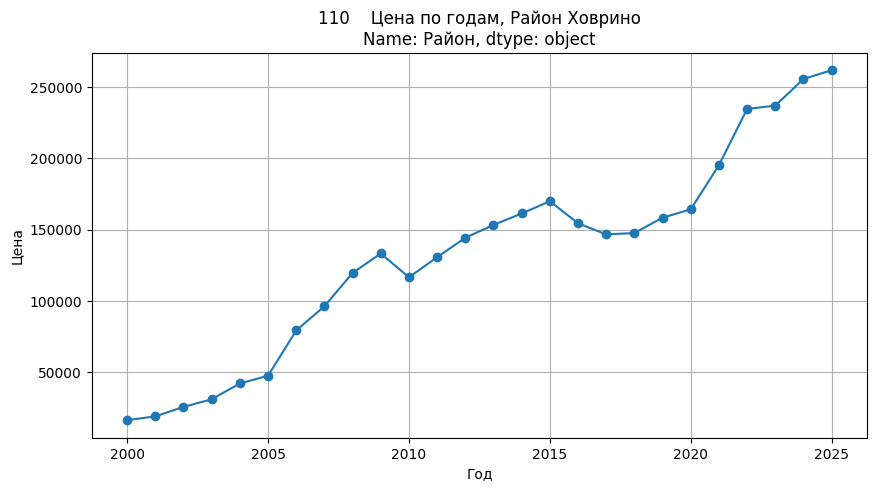

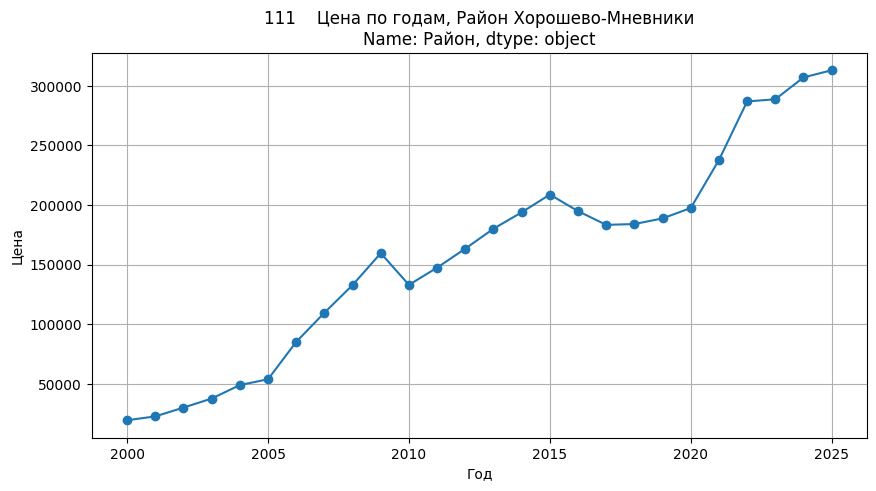

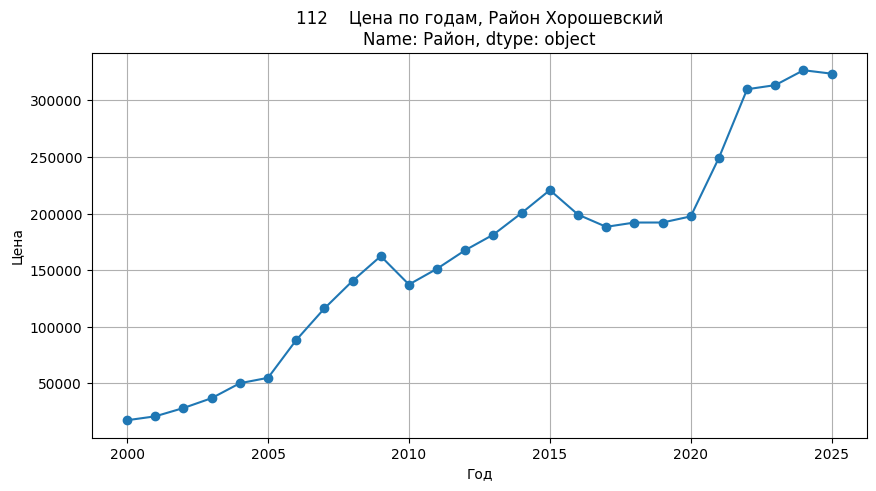

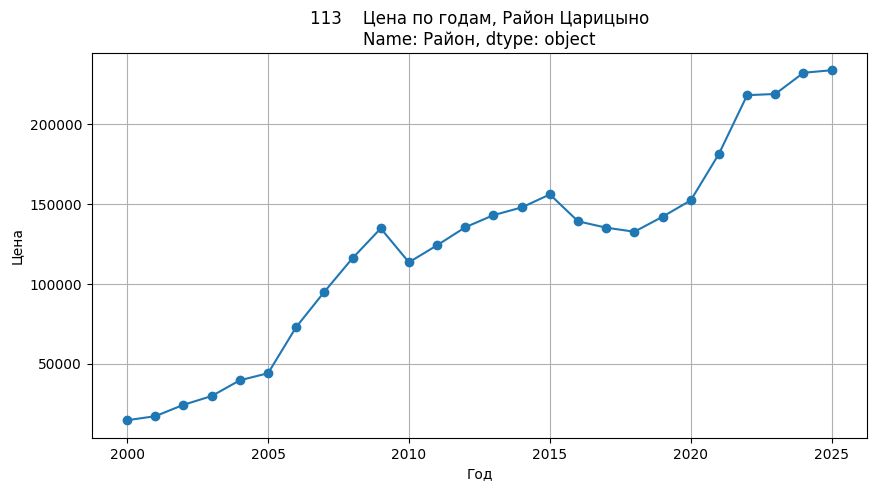

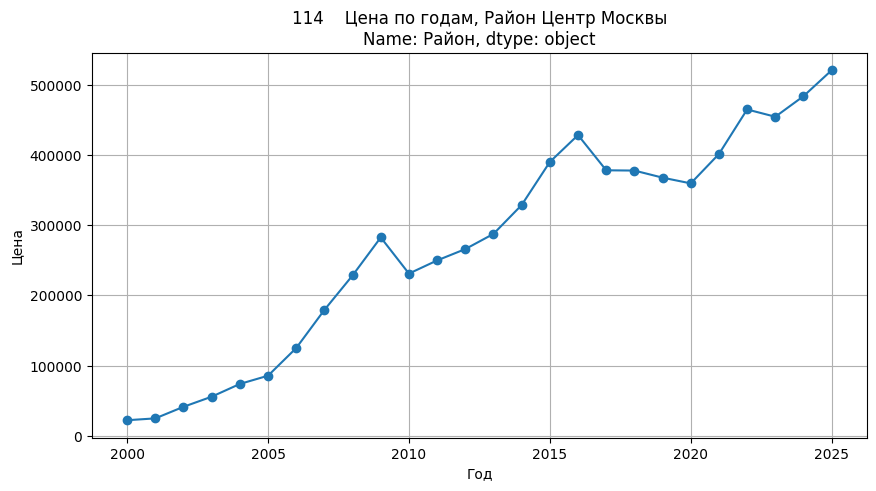

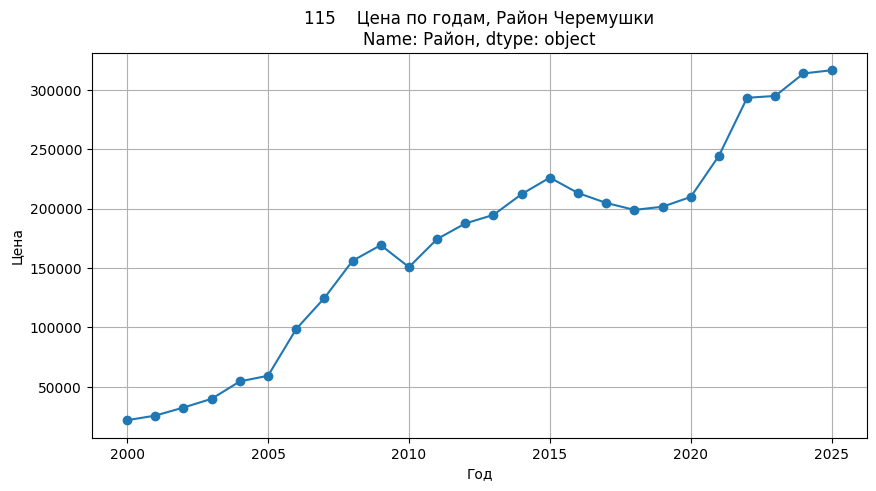

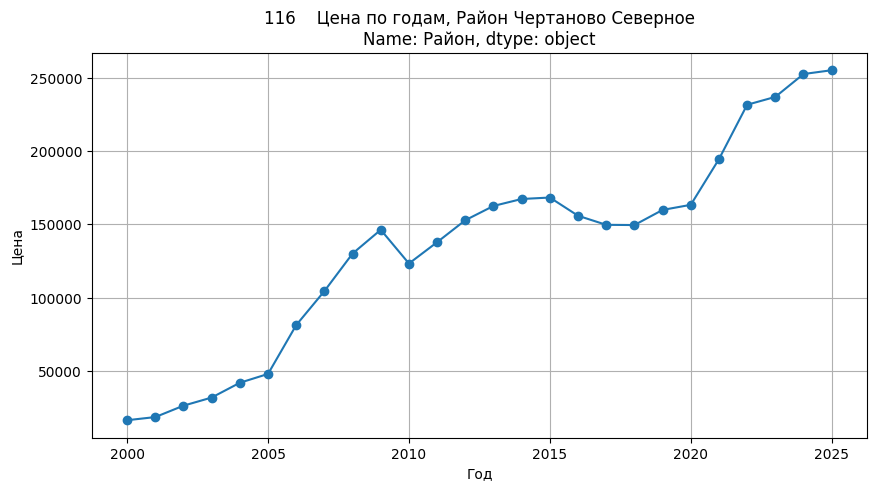

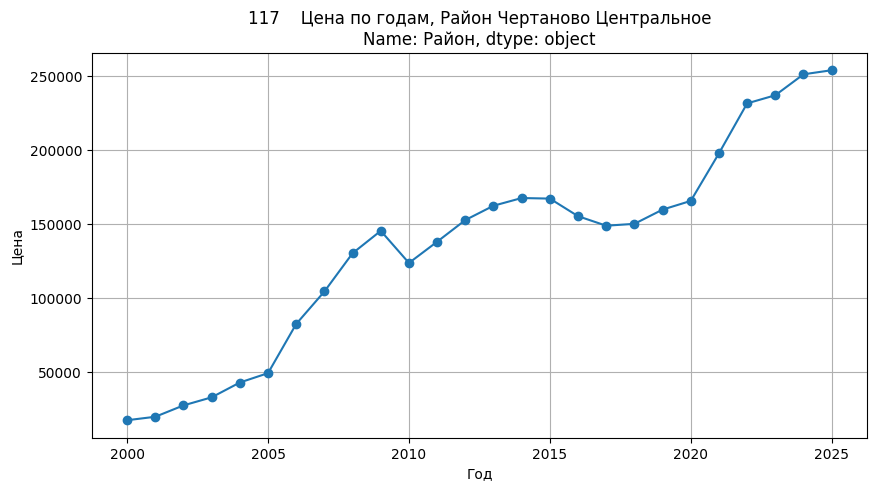

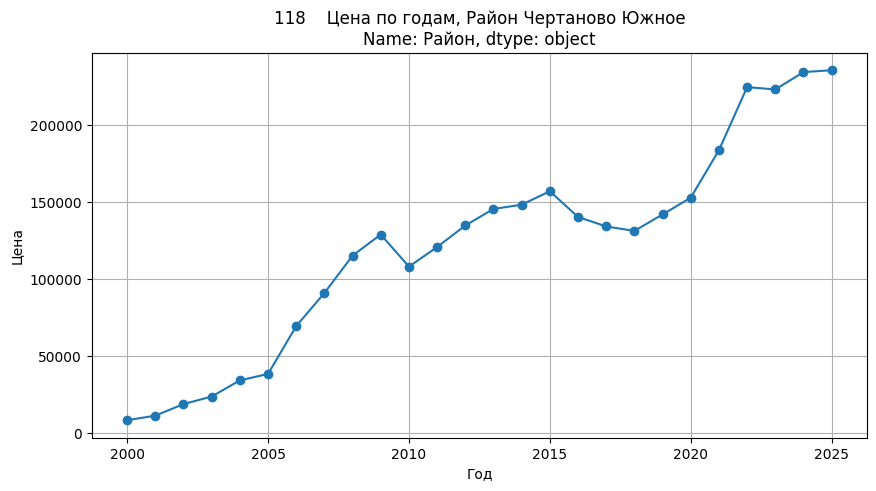

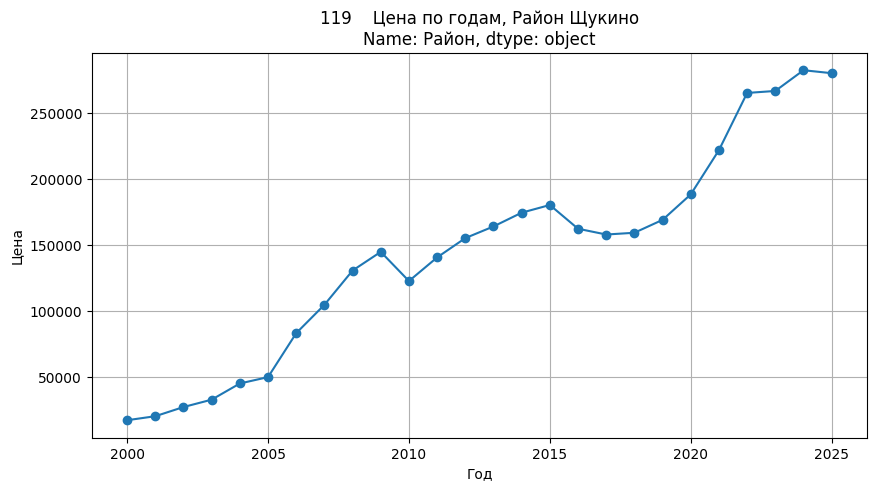

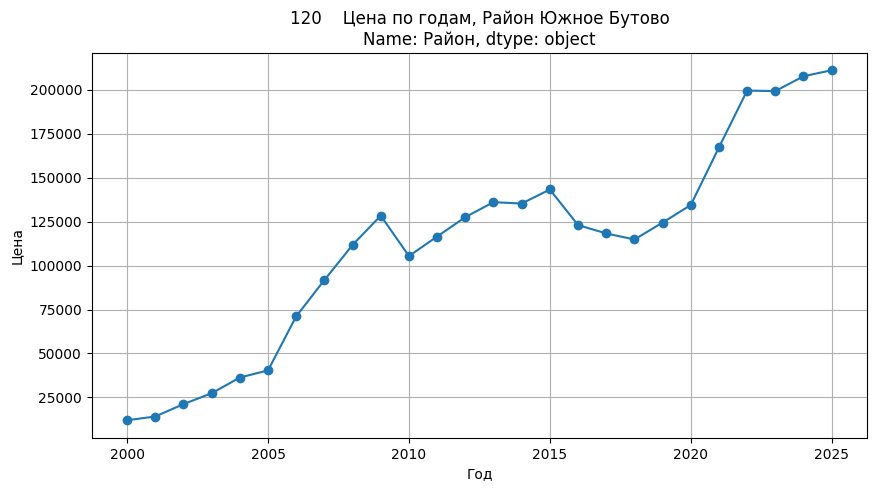

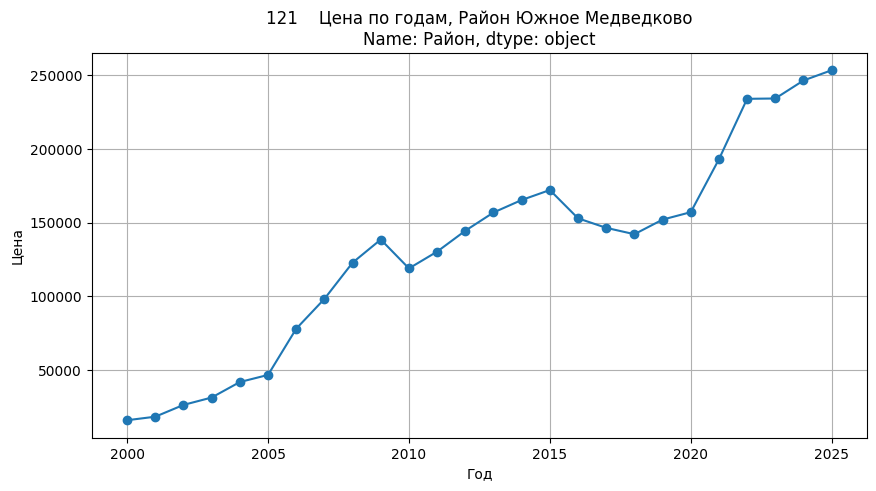

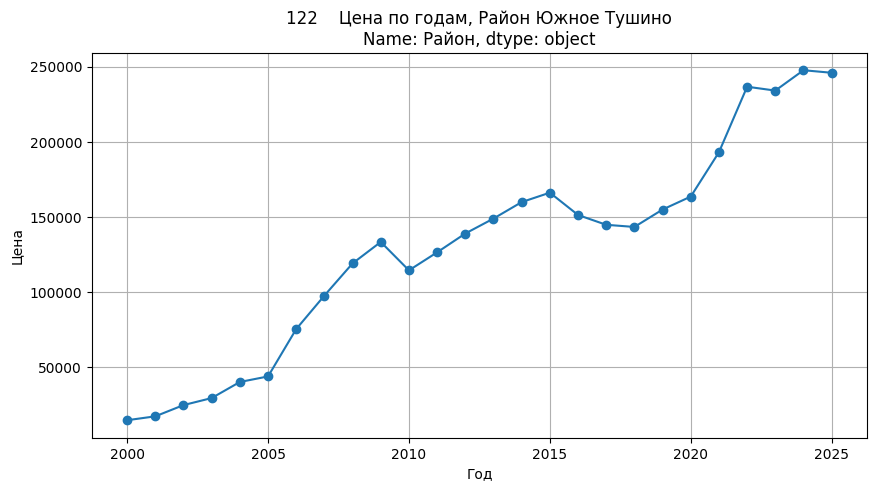

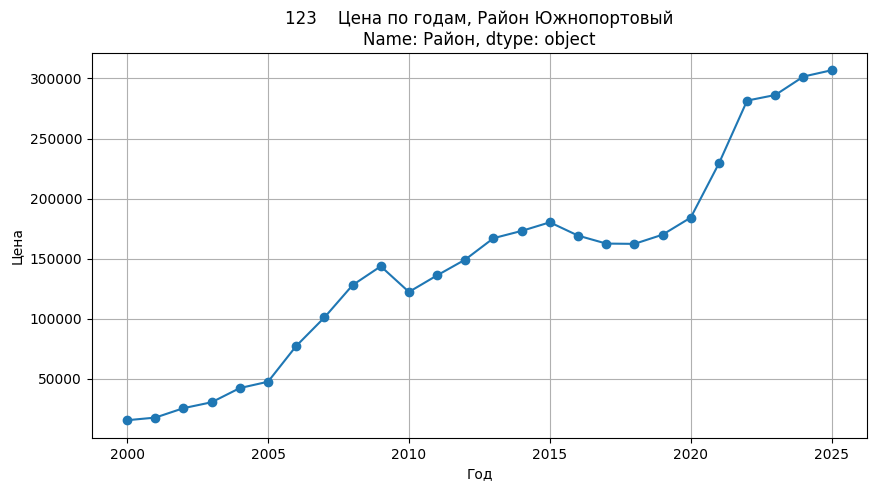

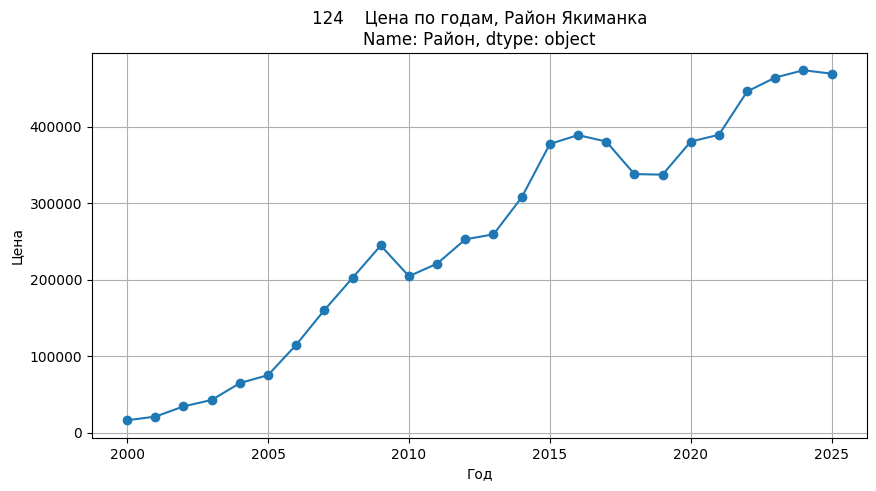

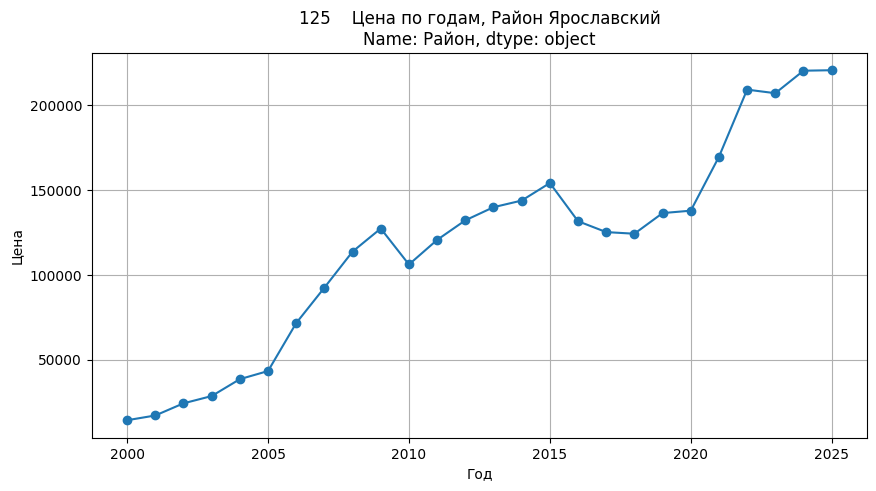

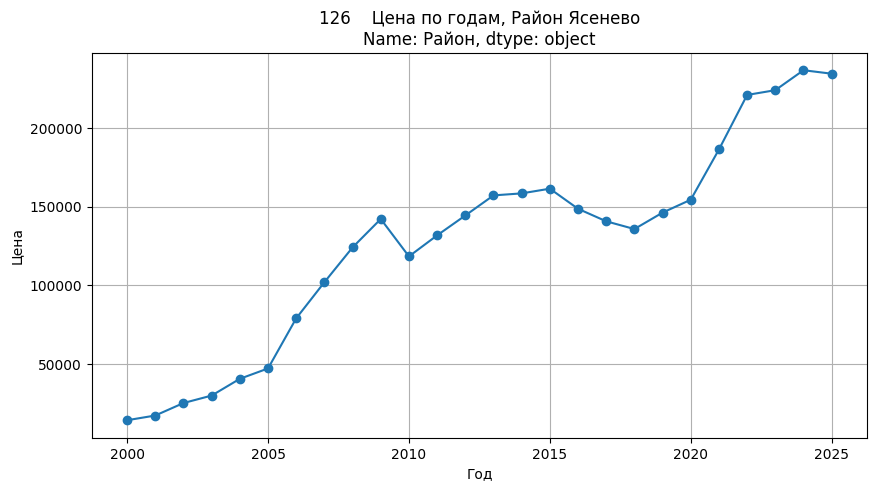

In [200]:
import pandas as pd
import matplotlib.pyplot as plt

for i in range(0, 127):
    filtered_df = df_merged[df_merged['Район'] == i]
    
    plt.figure(figsize=(10, 5))
    plt.plot(filtered_df['Год'], filtered_df['Цена'], marker='o')
    plt.title('Цена по годам, ' + districts.loc[[i]]['Район'])
    plt.xlabel('Год')
    plt.ylabel('Цена')
    plt.grid(True)
    plt.show()

In [201]:
df_merged

Год           Цена  Район  Ковид  Санкции  Ключевая ставка ЦБ РФ (%)  \
0     2000   14211.886305    126      0        0                       28.0   
1     2001   17206.159648    126      0        0                       25.0   
2     2002   25140.702984    126      0        0                       23.0   
3     2003   29885.760914    126      0        0                       14.0   
4     2004   40541.275670    126      0        0                       13.0   
...    ...            ...    ...    ...      ...                        ...   
3297  2021  216252.028123      0      1        1                        8.5   
3298  2022  256910.299003      0      1        2                       20.0   
3299  2023  255537.646788      0      0        2                       16.0   
3300  2024  269622.093023      0      0        2                       21.0   
3301  2025  272609.819121      0      0        2                       21.0   

      ИПЦ (% к декабрю предыдущего года)   Доллар  
0                                  119.3  28.8300  
1                                  118.6  30.1400  
2                                  115.1  31.7844  
3                                  112.0  29.4545  
4                                  111.7  27.7487  
...                                  ...      ...  
3297                               108.4  73.6552  
3298                               111.9  68.5386  
3299                               107.4  85.2997  
3300                               109.5  92.6225  
3301                               110.2  89.0444  

[3302 rows x 8 columns]

In [203]:
sorted_df = df_merged.sort_values(by='Год').reset_index(drop=True)

In [204]:
sorted_df

Год           Цена  Район  Ковид  Санкции  Ключевая ставка ЦБ РФ (%)  \
0     2000   14211.886305    126      0        0                       28.0   
1     2000   21935.864647     43      0        0                       28.0   
2     2000   16085.271318    124      0        0                       28.0   
3     2000   14402.636054     10      0        0                       28.0   
4     2000   13800.085251     99      0        0                       28.0   
...    ...            ...    ...    ...      ...                        ...   
3297  2025  328528.249244     84      0        2                       21.0   
3298  2025  416127.426580     83      0        2                       21.0   
3299  2025  234446.432121    126      0        2                       21.0   
3300  2025  336232.741617      1      0        2                       21.0   
3301  2025  272609.819121      0      0        2                       21.0   

      ИПЦ (% к декабрю предыдущего года)   Доллар  
0                                  119.3  28.8300  
1                                  119.3  28.8300  
2                                  119.3  28.8300  
3                                  119.3  28.8300  
4                                  119.3  28.8300  
...                                  ...      ...  
3297                               110.2  89.0444  
3298                               110.2  89.0444  
3299                               110.2  89.0444  
3300                               110.2  89.0444  
3301                               110.2  89.0444  

[3302 rows x 8 columns]

In [210]:
sorted_df.to_csv('main.csv')